In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
df = pd.read_csv("./creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [3]:
df.drop(columns=["Time"], inplace = True, axis = 1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [4]:
df.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

In [5]:
df.mean()

V1        3.918649e-15
V2        5.682686e-16
V3       -8.761736e-15
V4        2.811118e-15
V5       -1.552103e-15
V6        2.040130e-15
V7       -1.698953e-15
V8       -1.893285e-16
V9       -3.147640e-15
V10       1.772925e-15
V11       9.289524e-16
V12      -1.803266e-15
V13       1.674888e-15
V14       1.475621e-15
V15       3.501098e-15
V16       1.392460e-15
V17      -7.466538e-16
V18       4.258754e-16
V19       9.019919e-16
V20       5.126845e-16
V21       1.473120e-16
V22       8.042109e-16
V23       5.282512e-16
V24       4.456271e-15
V25       1.426896e-15
V26       1.701640e-15
V27      -3.662252e-16
V28      -1.217809e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [6]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

Text(0.5, 1.0, 'Correlation Heat Map for all features')

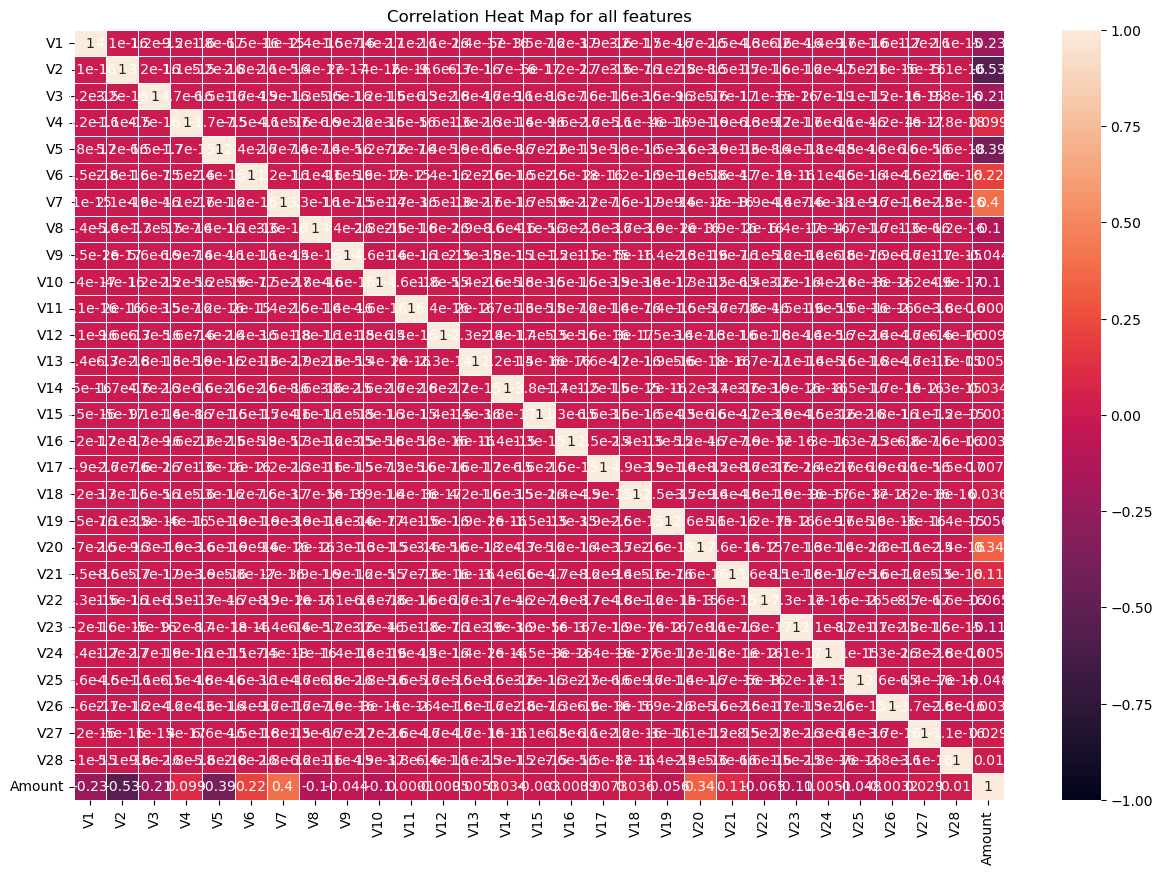

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(df.drop(columns = ["Class"], axis = 1).corr(), annot=True, linewidth=.5, vmin=-1, vmax=1)
plt.title("Correlation Heat Map for all features")

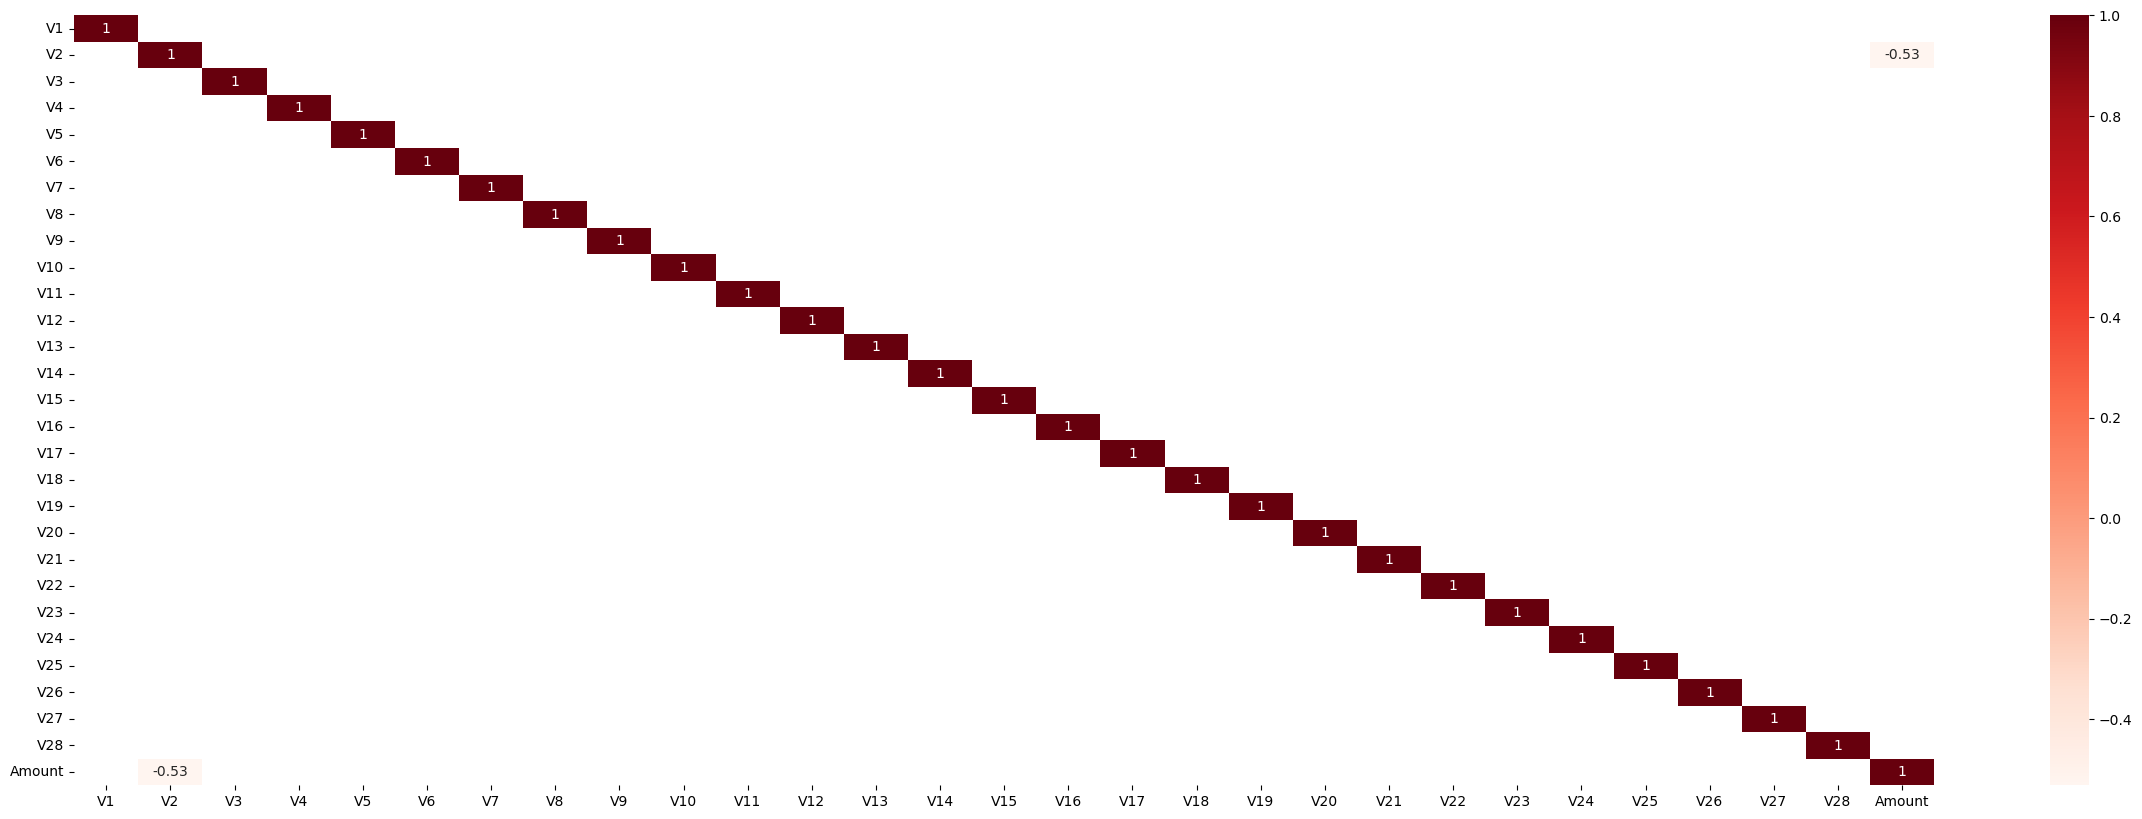

In [9]:
dfCorr = df.drop(columns = ["Class"], axis = 1).corr()
filteredDf = dfCorr[(dfCorr.abs()>=0.5)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

## Amount and V2 have good dependency on each other so we can drop either v2 or Amount.

Text(0.5, 1.0, 'Variance contributed by each column')

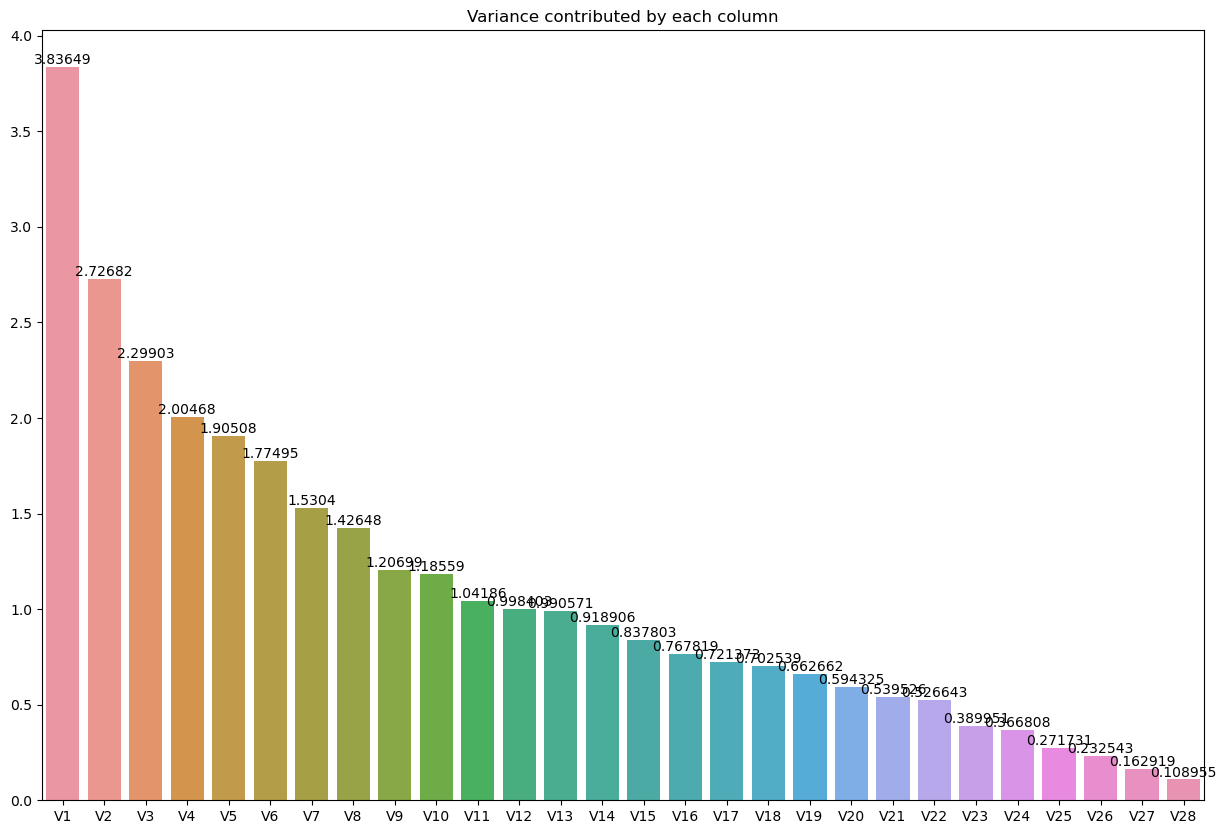

In [10]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = df.drop(columns = ["Class", "Amount"], axis = 1).columns, y=df.drop(columns = ["Class", "Amount"], axis = 1).var(), errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Variance contributed by each column")

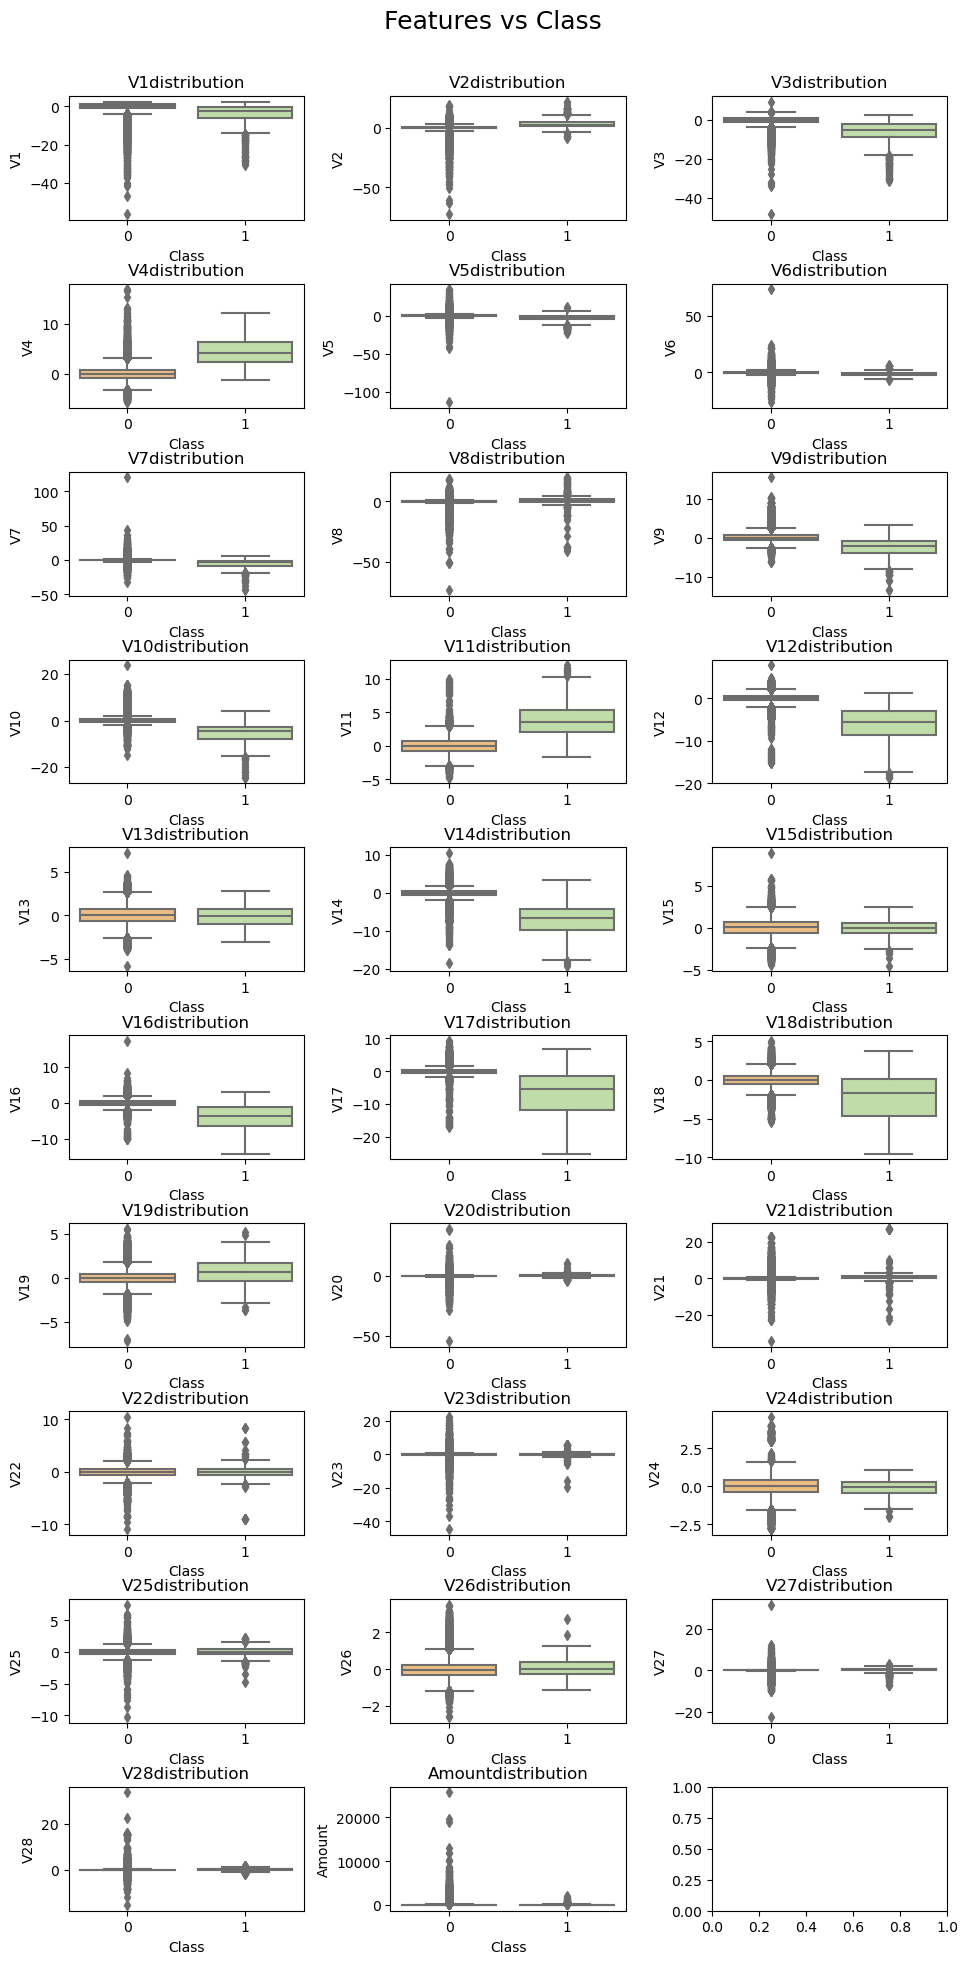

In [11]:
fig, axes = plt.subplots(nrows=int(len(df.columns)//3), ncols=3,figsize=(10,20))
fig.suptitle('Features vs Class\n', size = 18)
fig.tight_layout(pad=2.5)
count = 0
for i in range(len(df.columns)-1):
    sns.boxplot(ax=axes[int(count//3), count%3], data=df, x='Class', y=df.columns[count], palette='Spectral')
    axes[int(count//3), count%3].set_title(str(df.columns[count]) + "distribution")
    count+=1

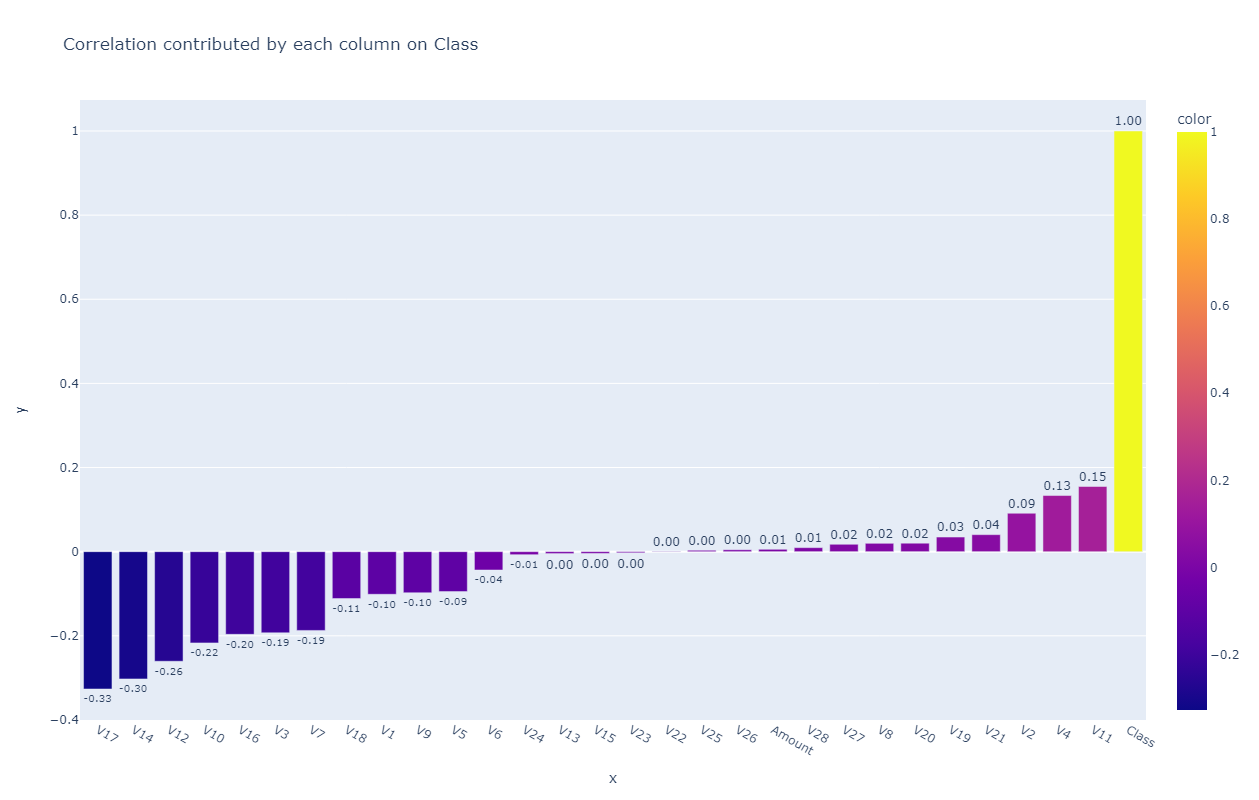

In [12]:
var_cor = df.corr()['Class'].sort_values()
fig = px.bar(x=var_cor.index, y=var_cor.values, color=var_cor.values, height=800, title="Correlation contributed by each column on Class", text = var_cor.values, text_auto='.2f')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [13]:
imp_col = var_cor[(var_cor.abs()>0.15)].index
imp_col

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'Class'], dtype='object')

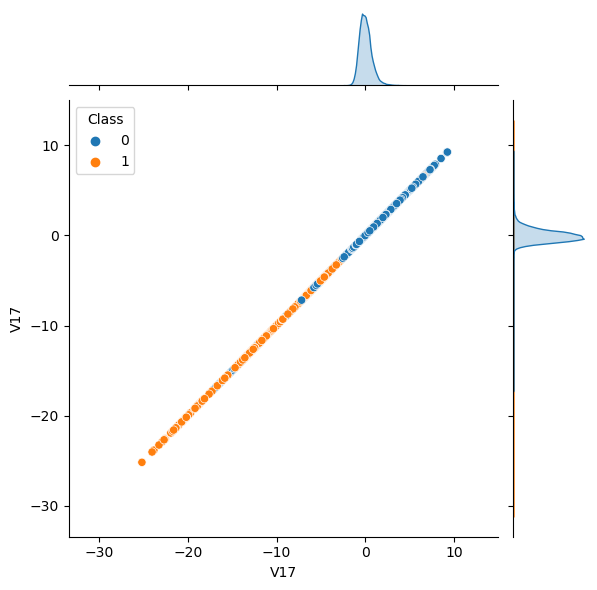

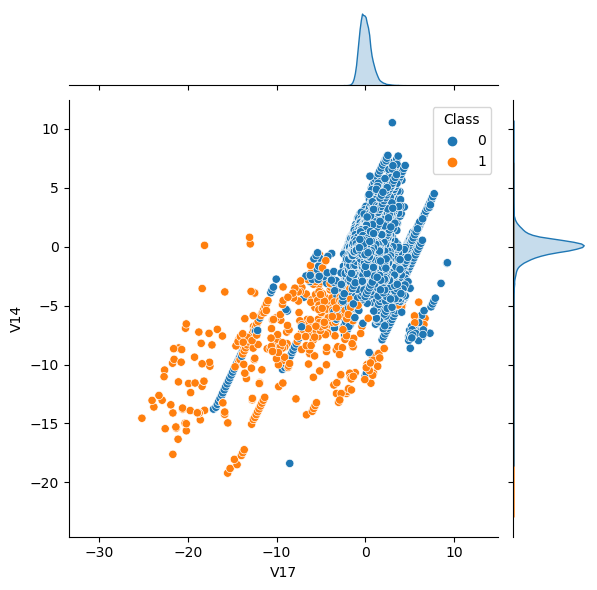

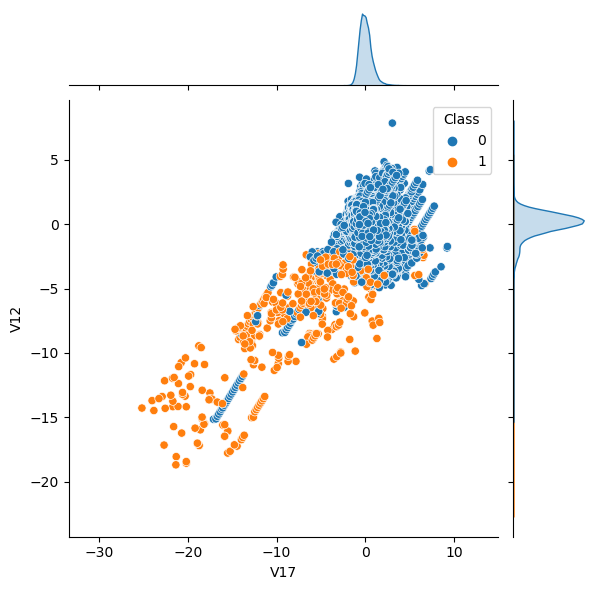

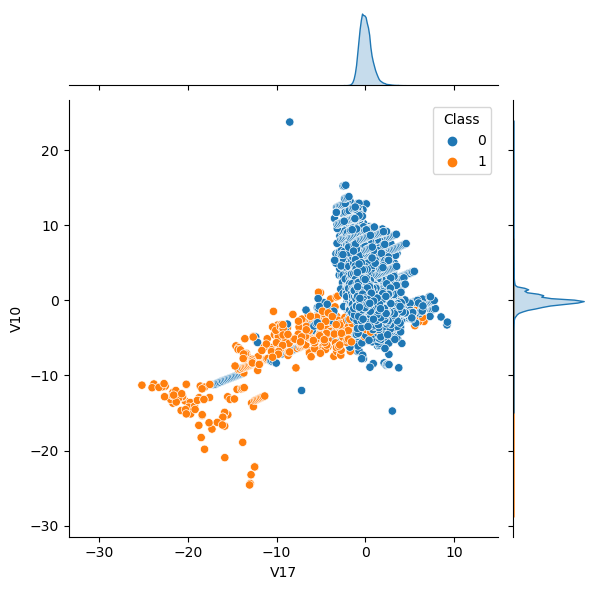

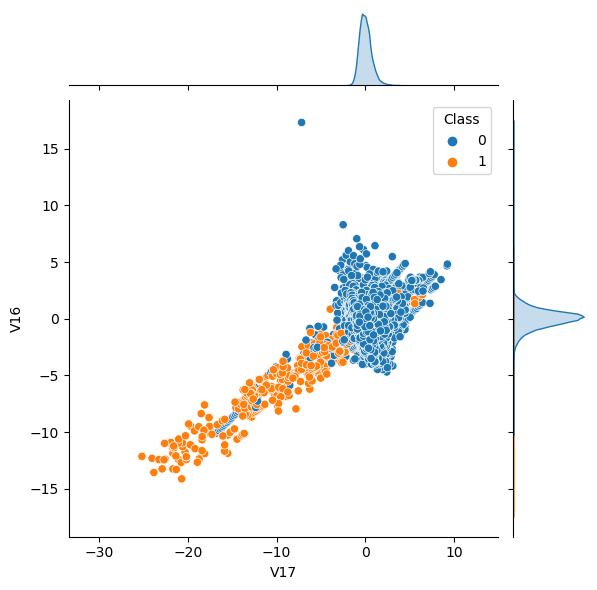

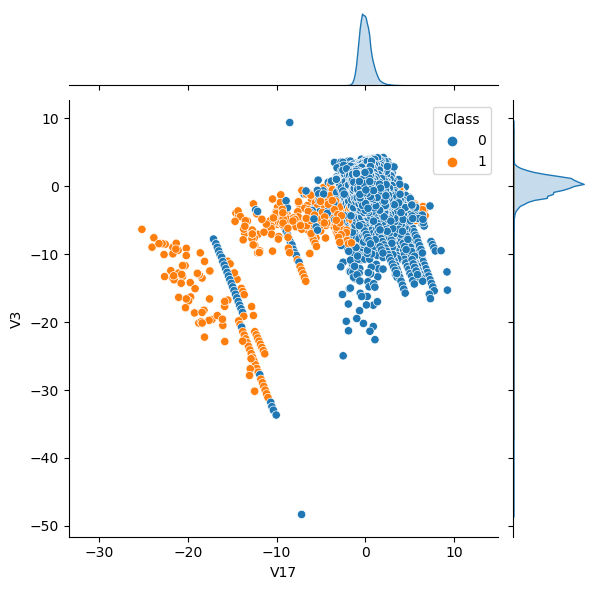

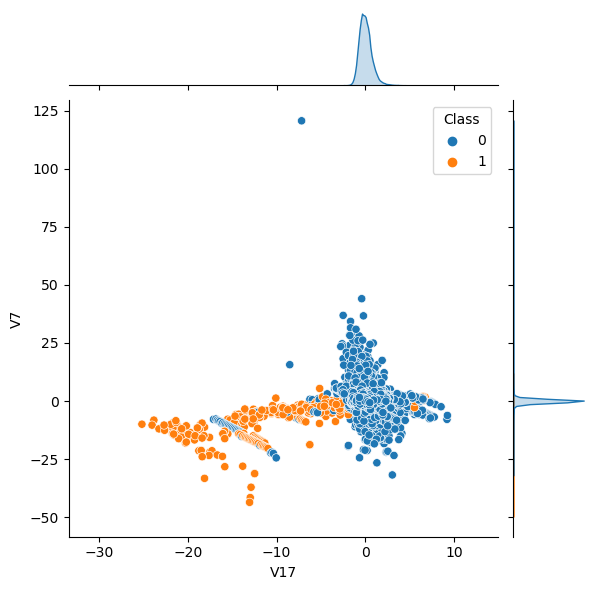

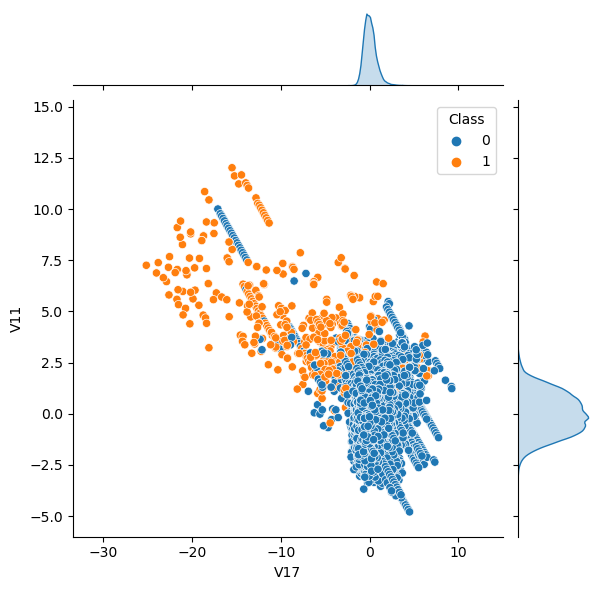

In [14]:
for i in range(len(imp_col)-1):
    sns.jointplot(x=df[imp_col[0]], y=df[imp_col[i]],hue='Class', data=df)

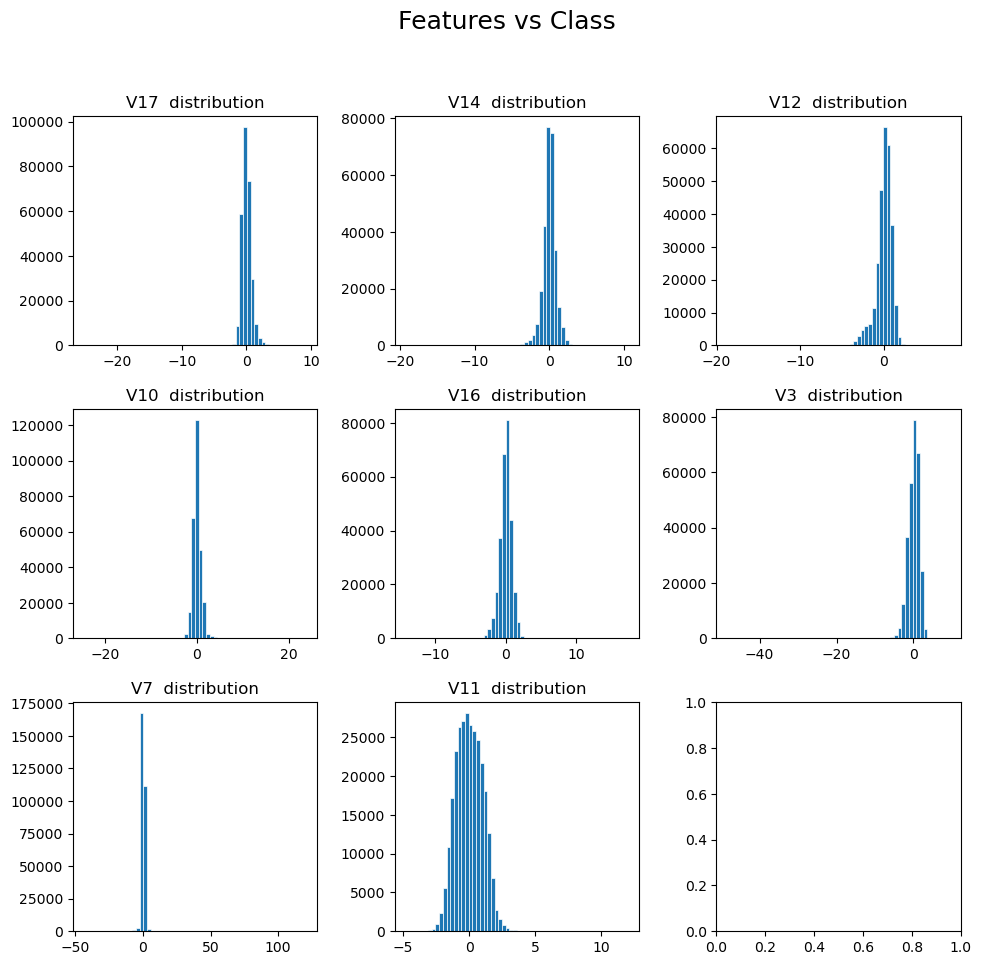

In [15]:
fig, axes = plt.subplots(nrows=int(len(imp_col)//3), ncols=3,figsize=(10,10))
fig.suptitle('Features vs Class\n', size = 18)
fig.tight_layout(pad=2.5)
count = 0
for i in range(len(imp_col)-1):
    axes[int(count//3), count%3].hist(df[imp_col[i]], bins=60, linewidth=0.5, edgecolor="white")
    axes[int(count//3), count%3].set_title(str(imp_col[i]) + "  distribution")
    count+=1

In [16]:
def detect_outliers(df,n,cols):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers
    """
    outlier_row = []
    for col in imp_col:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # Determining a list of indices of outliers for feature col
        outlier_row_index = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR )].index
        
        # appending the found outlier indices for col to the list of outlier indices 
        outlier_row.extend(outlier_row_index)
        #print(str(col), outlier_list_col)
    # selecting observations containing more than n outliers
    outlier_row = Counter(outlier_row)
    outlier_row_list = list( k for k, v in outlier_row.items() if v > n )
    
    return outlier_row_list

In [17]:
outlier = detect_outliers(df,5,df.drop(["Class"],axis = 1).columns)
# dropping outlier rows
df_out = df.drop(outlier, axis = 0).reset_index(drop=True)
df_out

V1        V2        V3        V4        V5        V6        V7  \
0      -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1       1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2      -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3      -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4      -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...          ...       ...       ...       ...       ...       ...       ...   
284130  0.120316  0.931005 -0.546012 -0.745097  1.130314 -0.235973  0.812722   
284131 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415  0.024330   
284132  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260 -0.296827   
284133 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708 -0.686180   
284134 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617  1.577006   

              V8        V9       V10  ...       V21       V22       V23  \
0       0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474   
1       0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288   
2       0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412   
3       0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321   
4      -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458   
...          ...       ...       ...  ...       ...       ...       ...   
284130  0.115093 -0.204064 -0.657422  ... -0.314205 -0.808520  0.050343   
284131  0.294869  0.584800 -0.975926  ...  0.214205  0.924384  0.012463   
284132  0.708417  0.432454 -0.484782  ...  0.232045  0.578229 -0.037501   
284133  0.679145  0.392087 -0.399126  ...  0.265245  0.800049 -0.163298   
284134 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
0       0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1      -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2      -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3      -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4       0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  
...          ...       ...       ...       ...       ...     ...    ...  
284130  0.102800 -0.435870  0.124079  0.217940  0.068803    2.69      0  
284131 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79      0  
284132  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88      0  
284133  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00      0  
284134  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00      0  

[284135 rows x 30 columns]

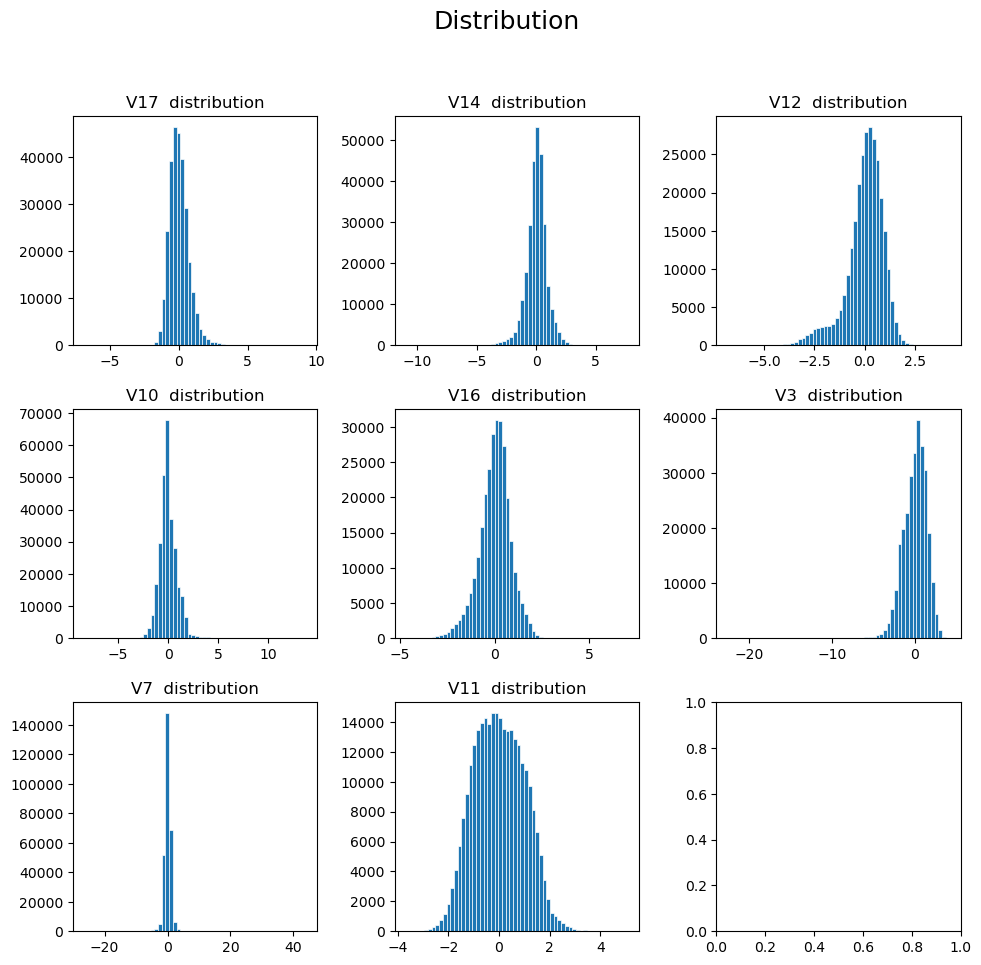

In [18]:
fig, axes = plt.subplots(nrows=int(len(imp_col)//3), ncols=3,figsize=(10,10))
fig.suptitle('Distribution\n', size = 18)
fig.tight_layout(pad=2.5)
count = 0
for i in range(len(imp_col)-1):
    axes[int(count//3), count%3].hist(df_out[imp_col[i]], bins=60, linewidth=0.5, edgecolor="white")
    axes[int(count//3), count%3].set_title(str(imp_col[i]) + "  distribution")
    count+=1

In [19]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df before dropping outliers:  492
The amount of frauds in df after dropping outliers:  104


In [20]:
X = df[imp_col].drop('Class',axis=1).values
y = df['Class'].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 8), (71202, 8), (213605,), (71202,))

In [22]:
def confusion(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    print(classification_report(y_test, pred), '\n')
    
    RocCurveDisplay.from_estimator(estimator = model, X = X_test, y = y_test)
    
    f_1 = dict([("f1_score_binary", f1_score(y_test, pred, average="binary")),
                 ("f1_score_micro", f1_score(y_test, pred, average="micro")),
                ("f1_score_macro", f1_score(y_test, pred, average="macro")),
                ("f1_score_weighted", f1_score(y_test, pred, average="weighted"))
                 ])
    mcc = matthews_corrcoef(y_test, pred)
    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    except Exception as e:
        auc = None
        print(e)
    
    plt.show()
    return f_1, mcc, auc

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

In [24]:
algorithms = [KNeighborsClassifier(),RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(),
             LogisticRegression(), SGDClassifier(), DecisionTreeClassifier(), SVC(), DummyClassifier()]

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202
 



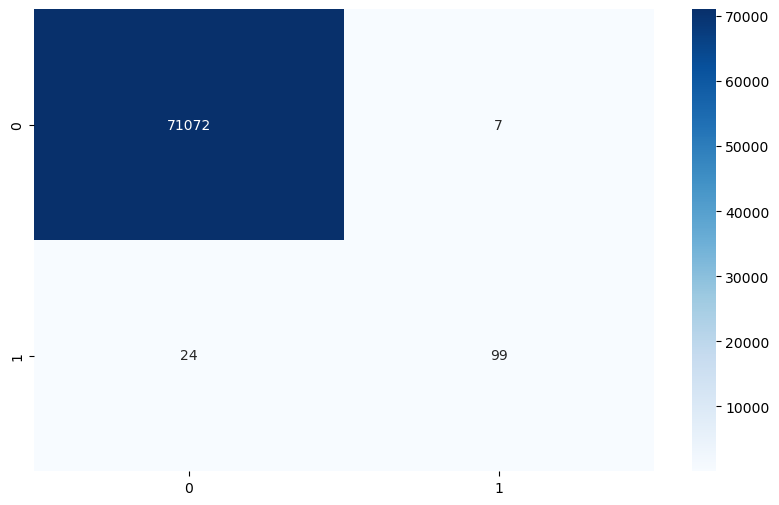

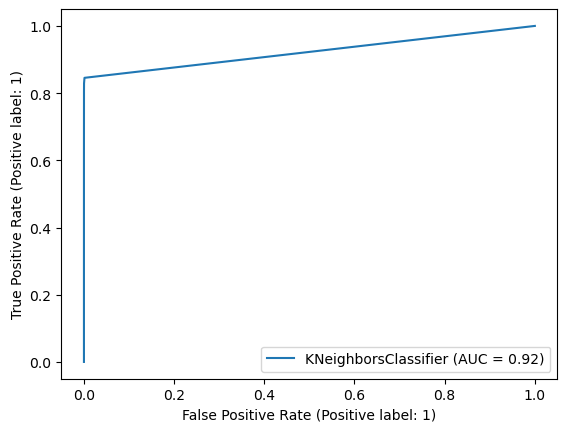

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.81      0.87       123

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202
 



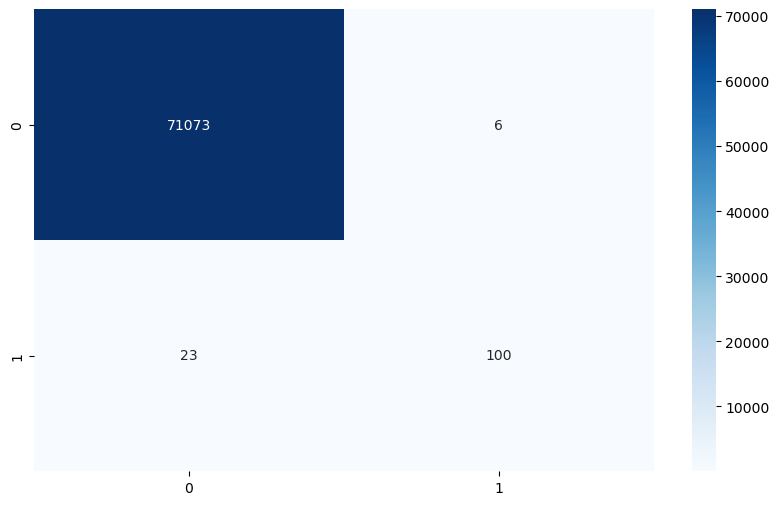

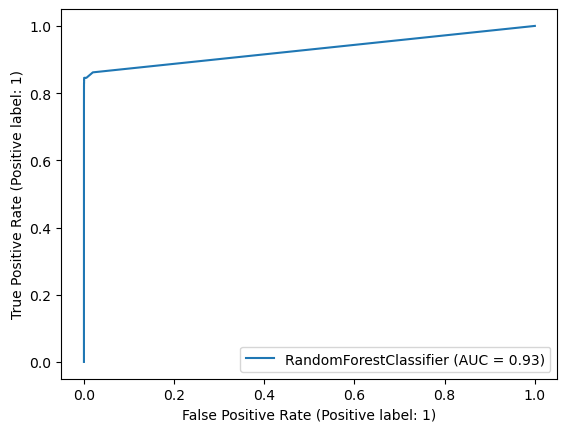

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.67      0.70       123

    accuracy                           1.00     71202
   macro avg       0.87      0.83      0.85     71202
weighted avg       1.00      1.00      1.00     71202
 



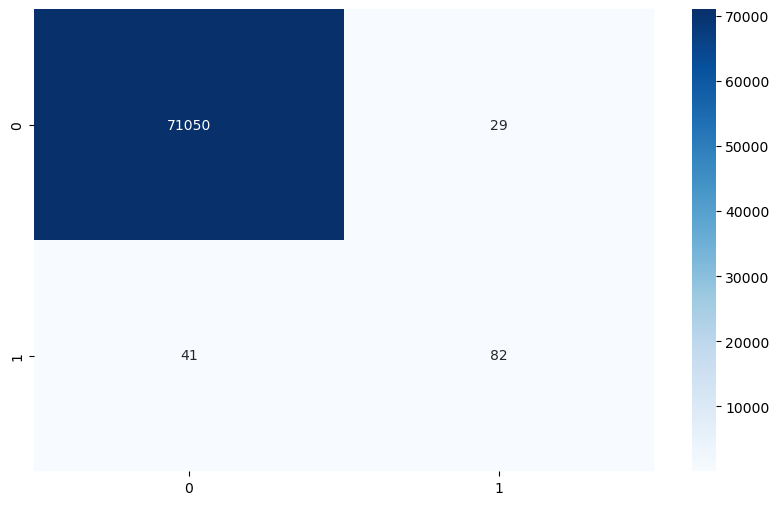

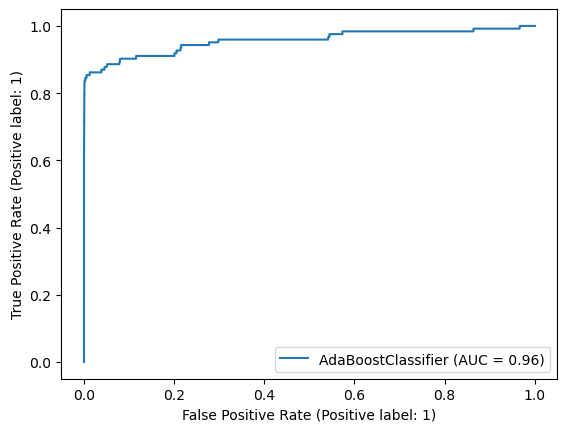

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.79      0.78       123

    accuracy                           1.00     71202
   macro avg       0.88      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202
 



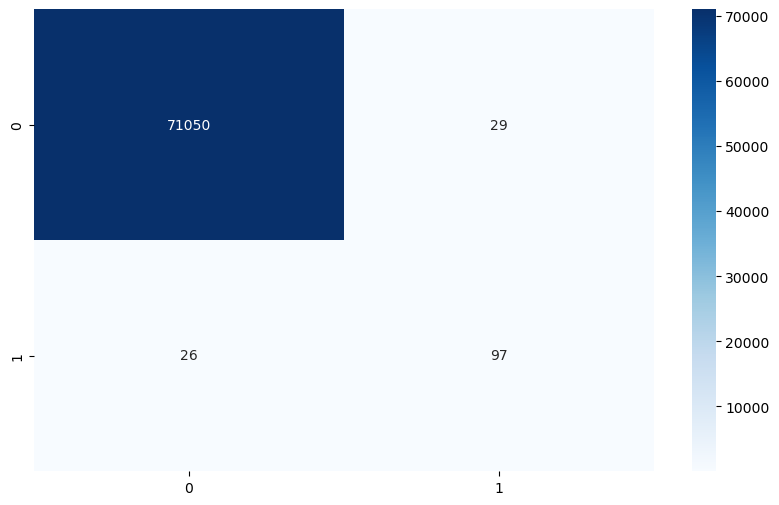

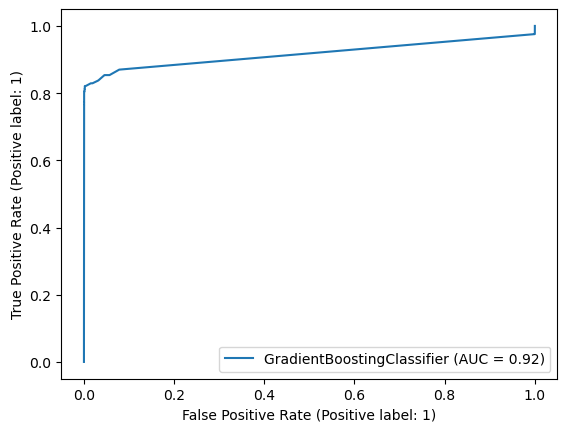

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.76      0.84       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202
 



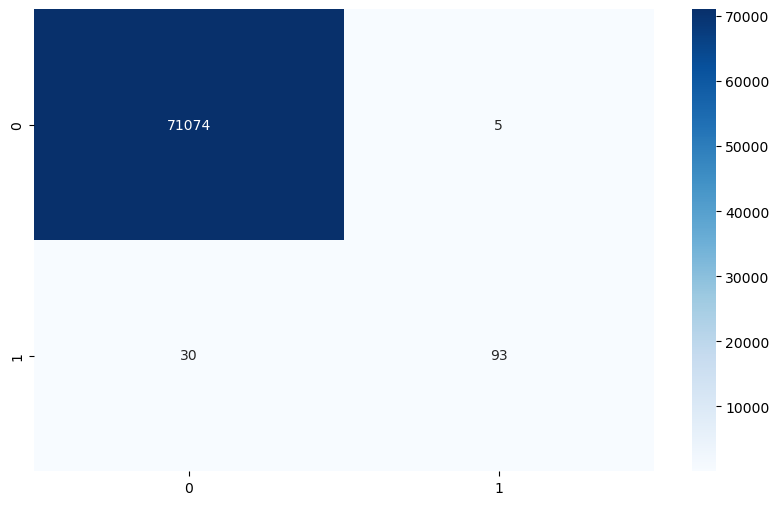

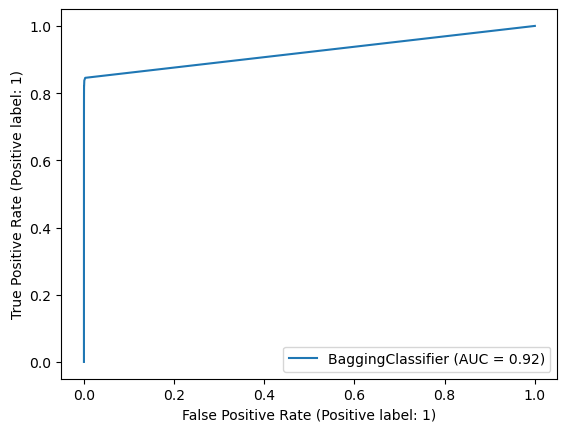

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.57      0.68       123

    accuracy                           1.00     71202
   macro avg       0.92      0.78      0.84     71202
weighted avg       1.00      1.00      1.00     71202
 



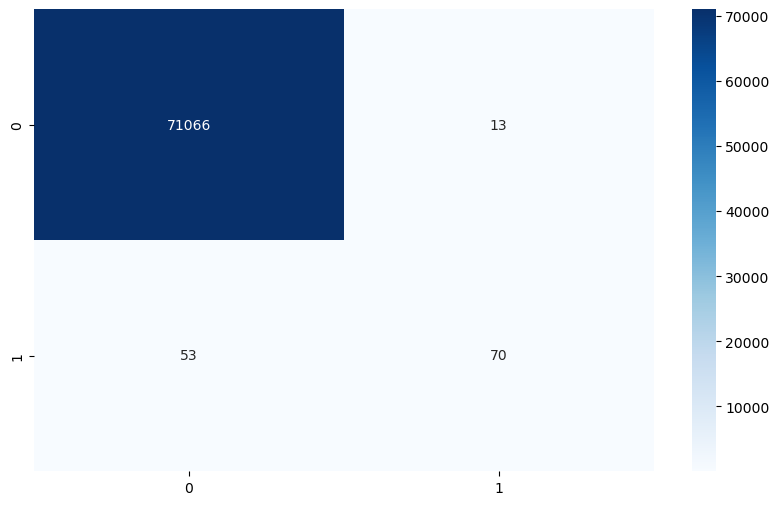

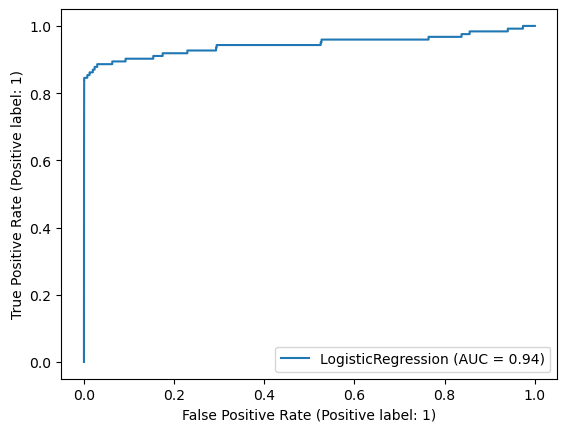

SGDClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.55      0.65       123

    accuracy                           1.00     71202
   macro avg       0.90      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202
 

probability estimates are not available for loss='hinge'


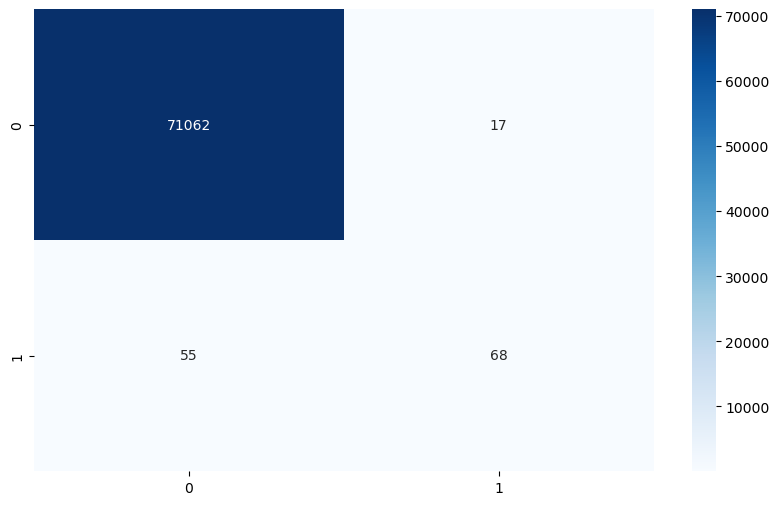

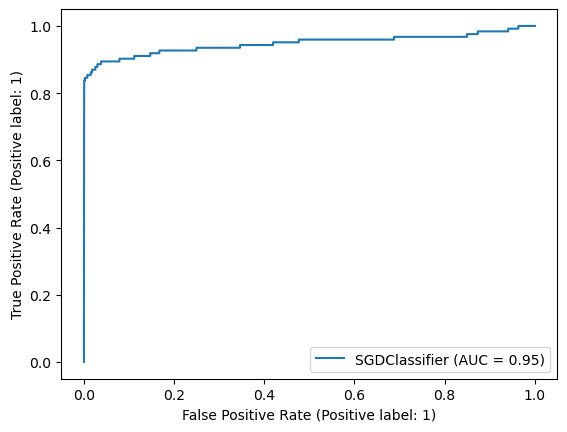

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.76      0.77       123

    accuracy                           1.00     71202
   macro avg       0.89      0.88      0.88     71202
weighted avg       1.00      1.00      1.00     71202
 



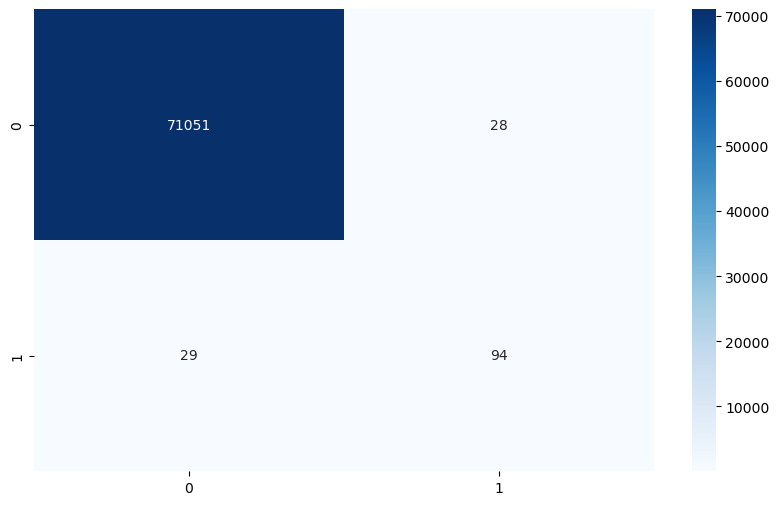

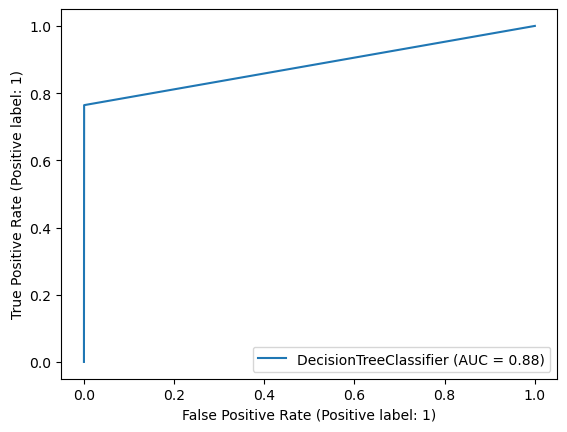

SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.67      0.79       123

    accuracy                           1.00     71202
   macro avg       0.98      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202
 

predict_proba is not available when  probability=False


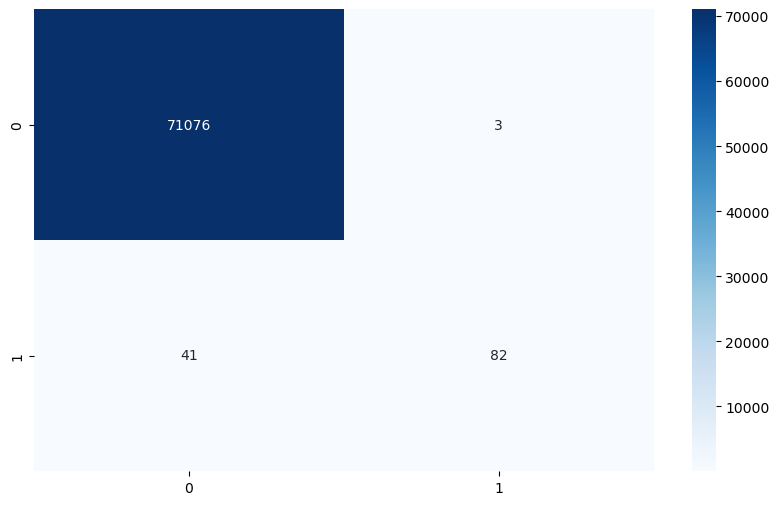

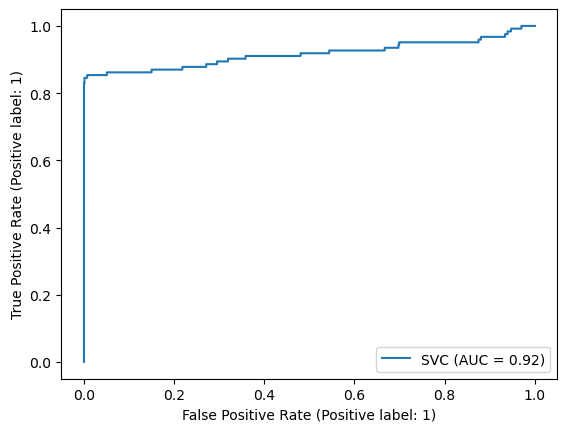

DummyClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202
 



C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



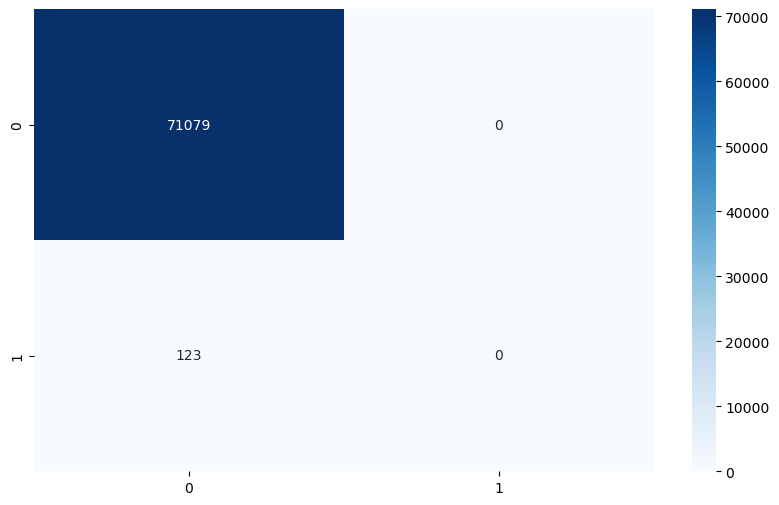

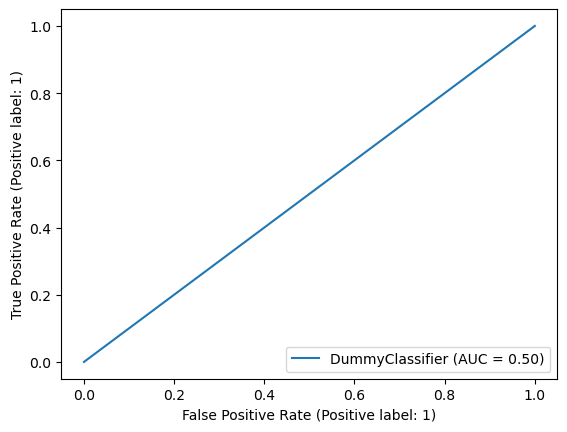

[['KNeighborsClassifier', {'f1_score_binary': 0.8646288209606988, 'f1_score_micro': 0.9995646189713772, 'f1_score_macro': 0.9322053899071122, 'f1_score_weighted': 0.9995484845696457}, 0.8668114417369984, 0.9226398383934882], ['RandomForestClassifier', {'f1_score_binary': 0.8733624454148471, 'f1_score_micro': 0.999592708069998, 'f1_score_macro': 0.9365792357195565, 'f1_score_weighted': 0.9995776145974103}, 0.8755833375798624, 0.9293040710342106], ['AdaBoostClassifier', {'f1_score_binary': 0.7008547008547009, 'f1_score_micro': 0.9990168815482711, 'f1_score_macro': 0.8501811662816094, 'f1_score_weighted': 0.9989917148733868}, 0.7012894131980525, 0.9564858384412993], ['GradientBoostingClassifier', {'f1_score_binary': 0.7791164658634538, 'f1_score_micro': 0.9992275497879273, 'f1_score_macro': 0.8893647821209922, 'f1_score_weighted': 0.9992321949516696}, 0.7787863446321862, 0.9164677868447532], ['BaggingClassifier', {'f1_score_binary': 0.8416289592760182, 'f1_score_micro': 0.9995084407741356

In [25]:
algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_train, y_train, X_test, y_test,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [26]:
df = pd.DataFrame(algo, columns = ["Model", "F_Score", "MCC", "AUC"])
df = pd.concat([df.drop(['F_Score'], axis=1), df['F_Score'].apply(pd.Series)], axis=1)
df

Model       MCC       AUC  f1_score_binary  \
0        KNeighborsClassifier  0.866811  0.922640         0.864629   
1      RandomForestClassifier  0.875583  0.929304         0.873362   
2          AdaBoostClassifier  0.701289  0.956486         0.700855   
3  GradientBoostingClassifier  0.778786  0.916468         0.779116   
4           BaggingClassifier  0.846838  0.922499         0.841629   
5          LogisticRegression  0.692380  0.944438         0.679612   
6               SGDClassifier  0.664573       NaN         0.653846   
7      DecisionTreeClassifier  0.766952  0.881917         0.767347   
8                         SVC  0.801693       NaN         0.788462   
9             DummyClassifier  0.000000  0.500000         0.000000   

   f1_score_micro  f1_score_macro  f1_score_weighted  
0        0.999565        0.932205           0.999548  
1        0.999593        0.936579           0.999578  
2        0.999017        0.850181           0.998992  
3        0.999228        0.889365           0.999232  
4        0.999508        0.920691           0.999481  
5        0.999073        0.839574           0.998983  
6        0.998989        0.826670           0.998897  
7        0.999199        0.883473           0.999198  
8        0.999382        0.894076           0.999326  
9        0.998273        0.499568           0.997410

### Random Under-Sampling of majority class

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [28]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.91      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202
 



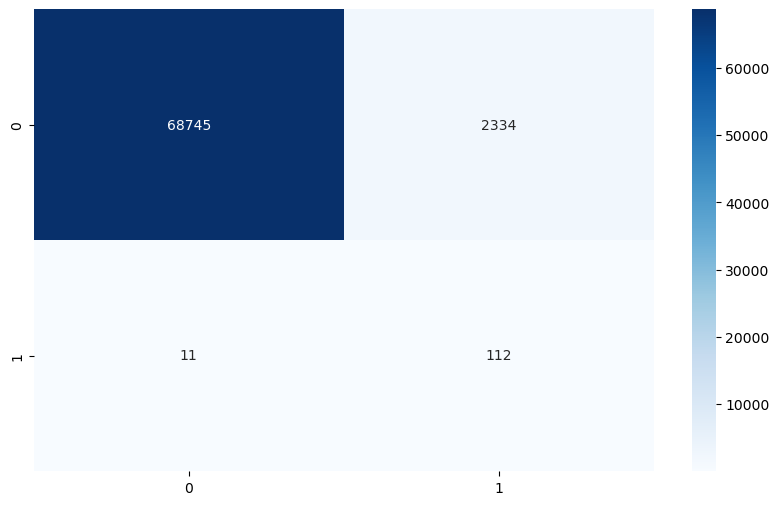

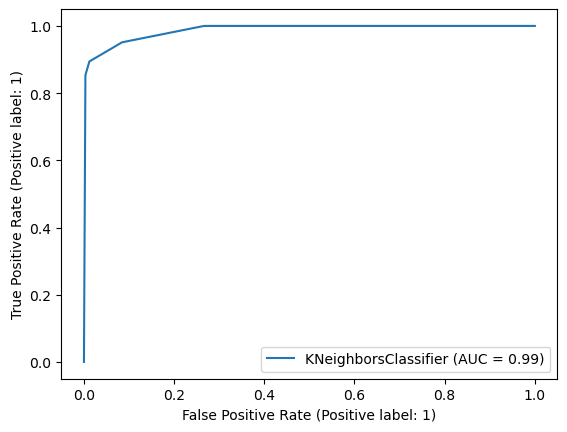

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.05      1.00      0.09       123

    accuracy                           0.96     71202
   macro avg       0.52      0.98      0.54     71202
weighted avg       1.00      0.96      0.98     71202
 



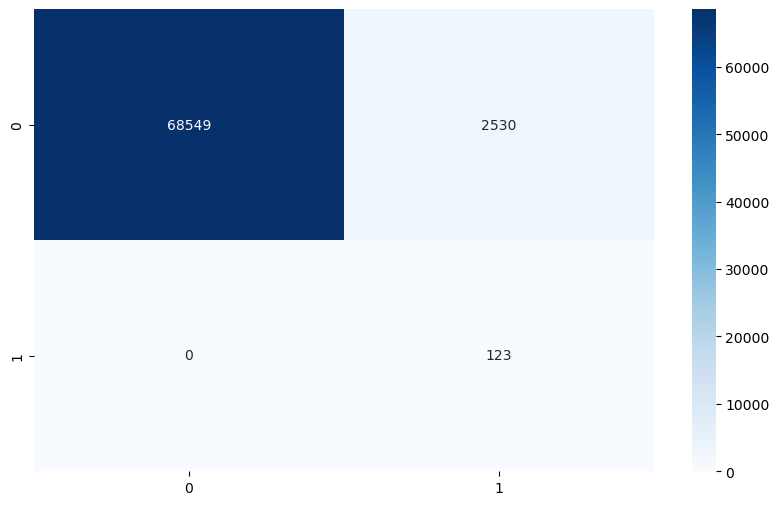

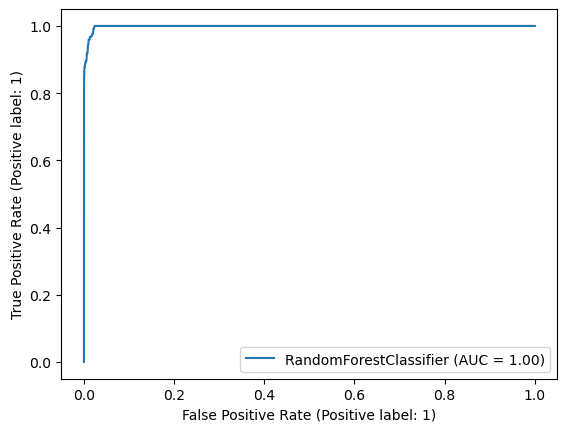

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.91      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.93      0.52     71202
weighted avg       1.00      0.95      0.98     71202
 



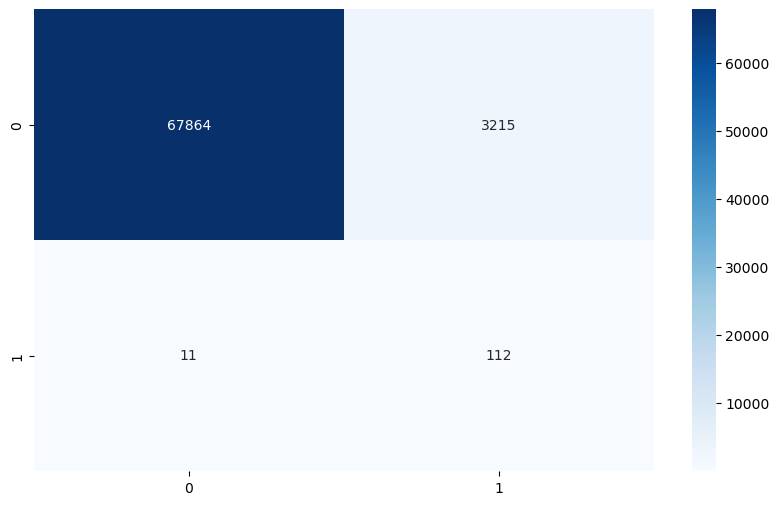

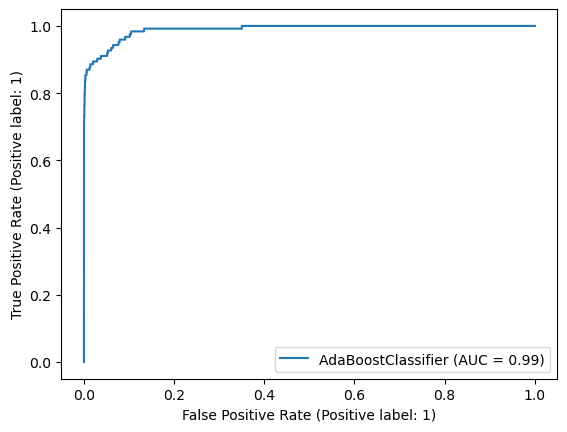

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.96      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.96      0.53     71202
weighted avg       1.00      0.96      0.98     71202
 



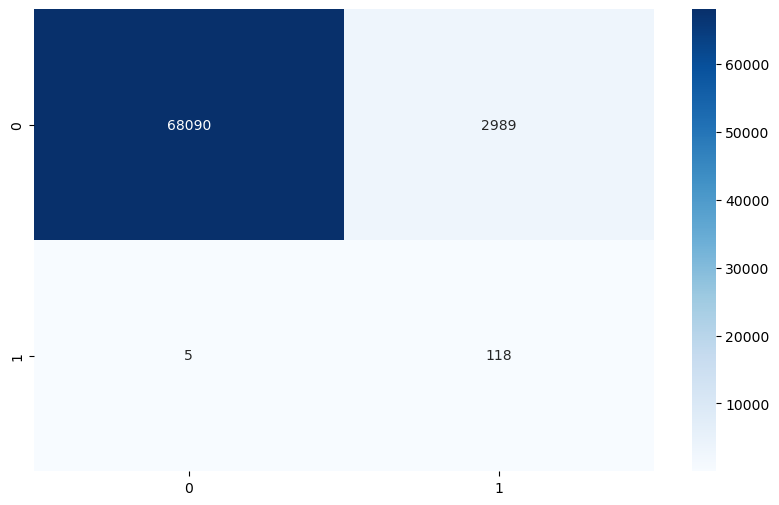

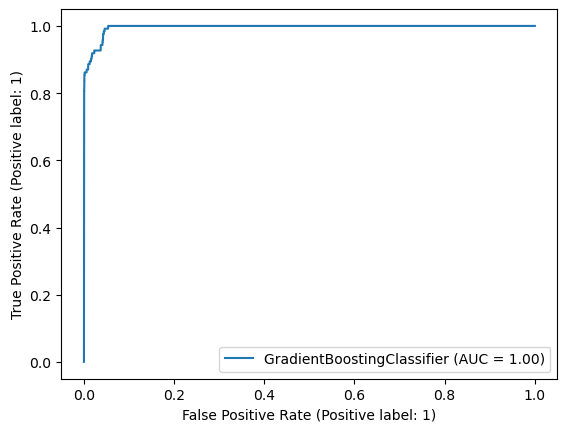

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.99      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.97      0.52     71202
weighted avg       1.00      0.95      0.97     71202
 



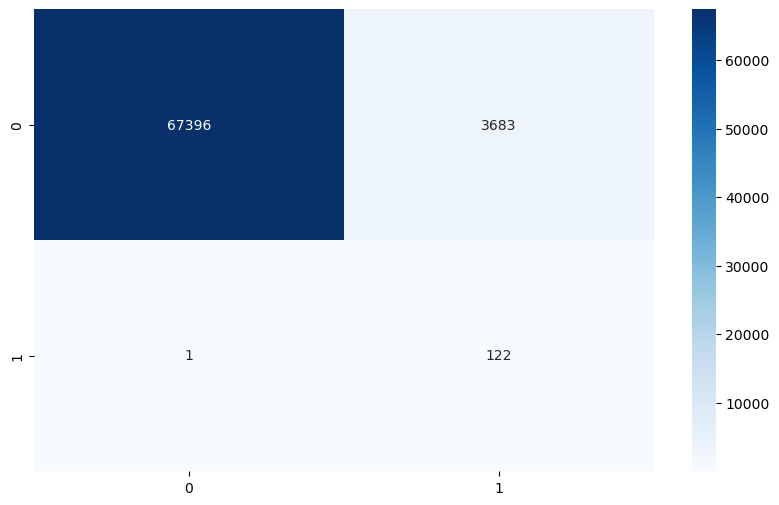

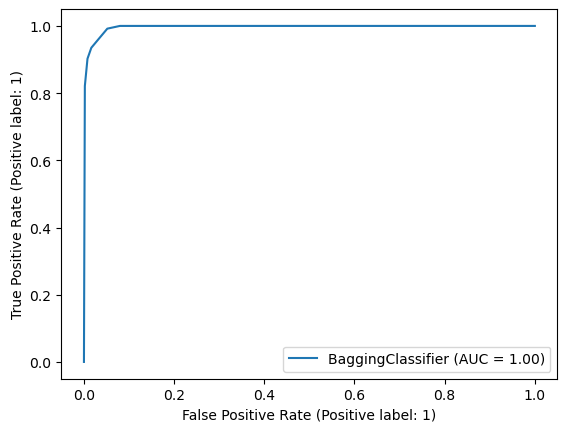

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.88      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202
 



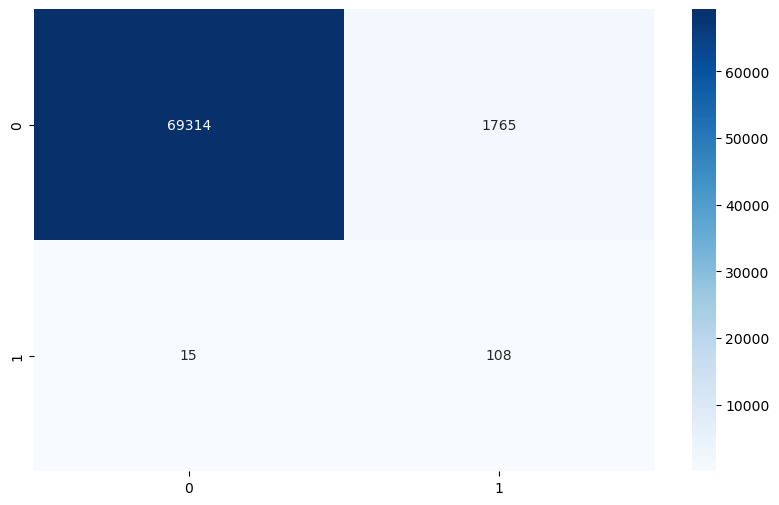

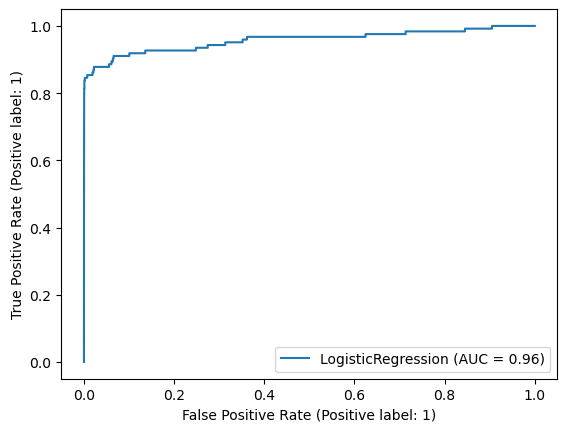

SGDClassifier
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     71079
           1       0.01      0.87      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.88      0.49     71202
weighted avg       1.00      0.90      0.94     71202
 

probability estimates are not available for loss='hinge'


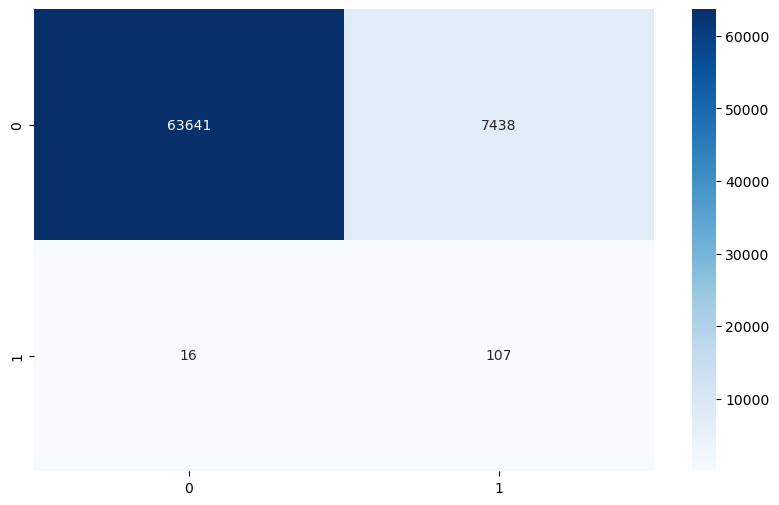

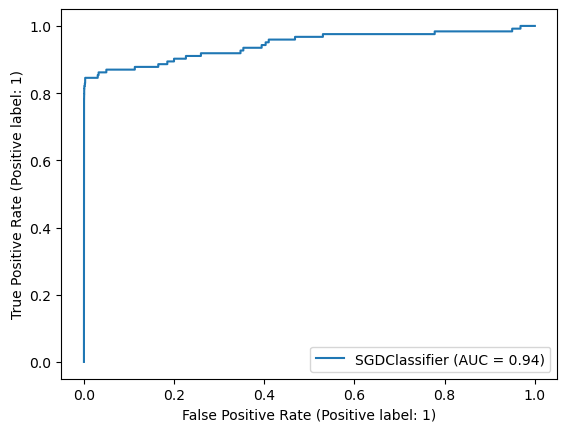

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     71079
           1       0.01      1.00      0.03       123

    accuracy                           0.88     71202
   macro avg       0.51      0.94      0.48     71202
weighted avg       1.00      0.88      0.94     71202
 



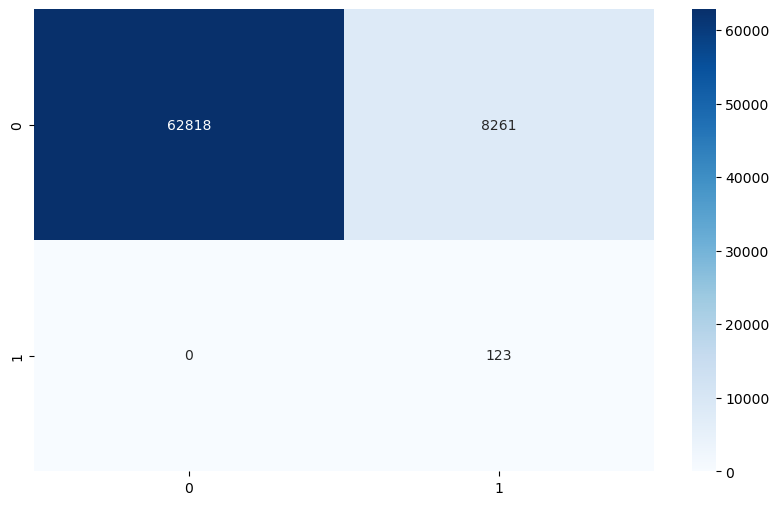

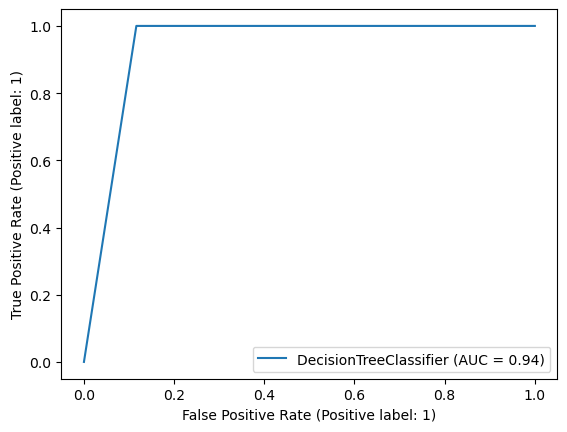

SVC
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.85      0.24       123

    accuracy                           0.99     71202
   macro avg       0.57      0.92      0.62     71202
weighted avg       1.00      0.99      0.99     71202
 

predict_proba is not available when  probability=False


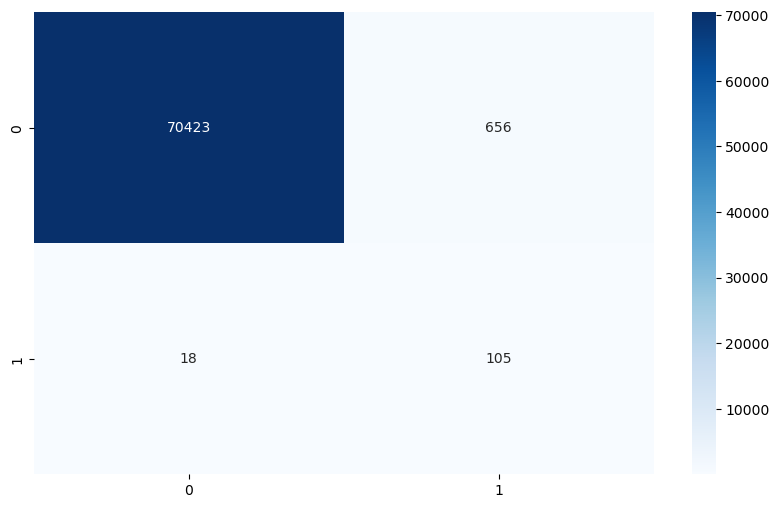

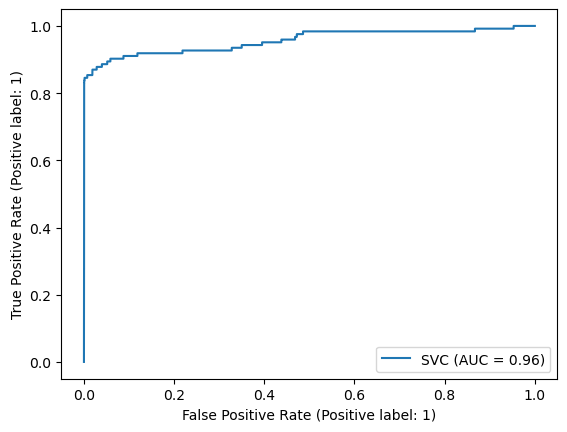

DummyClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202
 



C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



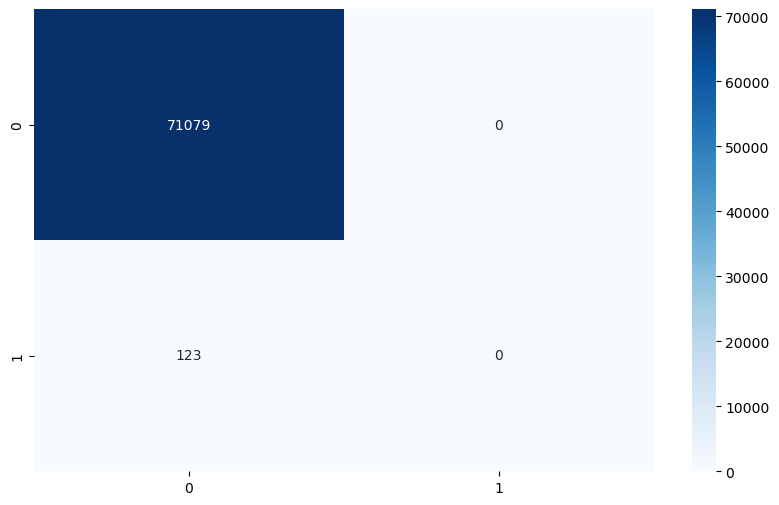

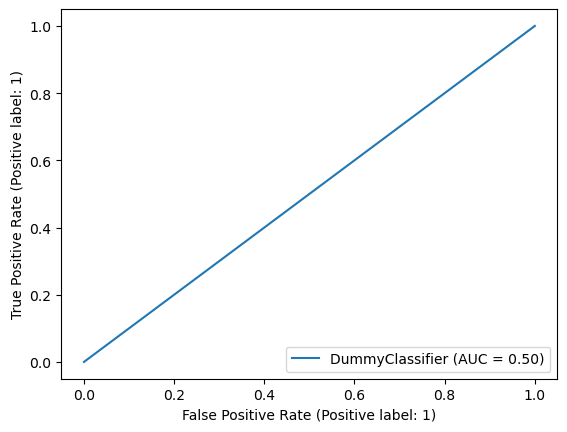

[['KNeighborsClassifier', {'f1_score_binary': 0.08719346049046321, 'f1_score_micro': 0.9670655318670824, 'f1_score_macro': 0.5352118480626593, 'f1_score_weighted': 0.9816823504161429}, 0.20012521606026554, 0.986993402623006], ['RandomForestClassifier', {'f1_score_binary': 0.08861671469740634, 'f1_score_micro': 0.964467290244656, 'f1_score_macro': 0.5352485699135182, 'f1_score_weighted': 0.980337330323541}, 0.21145299360758393, 0.9985260874851605], ['AdaBoostClassifier', {'f1_score_binary': 0.06492753623188406, 'f1_score_micro': 0.9546922839246088, 'f1_score_macro': 0.5208556100204572, 'f1_score_weighted': 0.9752084709477064}, 0.17026584391499838, 0.9891943202553622], ['GradientBoostingClassifier', {'f1_score_binary': 0.07306501547987616, 'f1_score_micro': 0.9579506193646246, 'f1_score_macro': 0.5257761883124589, 'f1_score_weighted': 0.976923262545047}, 0.18646843234125332, 0.9957966728192162], ['BaggingClassifier', {'f1_score_binary': 0.062118126272912404, 'f1_score_micro': 0.948259880

In [29]:
algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(x_rus, y_rus, X_test, y_test,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [30]:
df_rus = pd.DataFrame(algo, columns = ["Model", "F_Score", "MCC", "AUC"])
df_rus = pd.concat([df_rus.drop(['F_Score'], axis=1), df_rus['F_Score'].apply(pd.Series)], axis=1)
df_rus

Model       MCC       AUC  f1_score_binary  \
0        KNeighborsClassifier  0.200125  0.986993         0.087193   
1      RandomForestClassifier  0.211453  0.998526         0.088617   
2          AdaBoostClassifier  0.170266  0.989194         0.064928   
3  GradientBoostingClassifier  0.186468  0.995797         0.073065   
4           BaggingClassifier  0.173572  0.995913         0.062118   
5          LogisticRegression  0.221389  0.957591         0.108216   
6               SGDClassifier  0.103249       NaN         0.027908   
7      DecisionTreeClassifier  0.113867  0.941889         0.028917   
8                         SVC  0.341021       NaN         0.237557   
9             DummyClassifier  0.000000  0.500000         0.000000   

   f1_score_micro  f1_score_macro  f1_score_weighted  
0        0.967066        0.535212           0.981682  
1        0.964467        0.535249           0.980337  
2        0.954692        0.520856           0.975208  
3        0.957951        0.525776           0.976923  
4        0.948260        0.517757           0.971822  
5        0.975001        0.547770           0.985804  
6        0.895312        0.486293           0.943093  
7        0.883978        0.483610           0.936732  
8        0.990534        0.616397           0.993929  
9        0.998273        0.499568           0.997410

### Under-Sampling: Tomek Links
- Removing the instances of the majority class of each pair increases the space between the two classes

In [31]:
tl = TomekLinks()

# fit predictor and target variable
#ros = RandomOverSampler(random_state=42)
x_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284277, 1: 492})


In [32]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(x_tl,y_tl,test_size=0.25,random_state=42, stratify=y_tl)
X_train_tl.shape, X_test_tl.shape, y_train_tl.shape, y_test_tl.shape

((213576, 8), (71193, 8), (213576,), (71193,))

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202
 



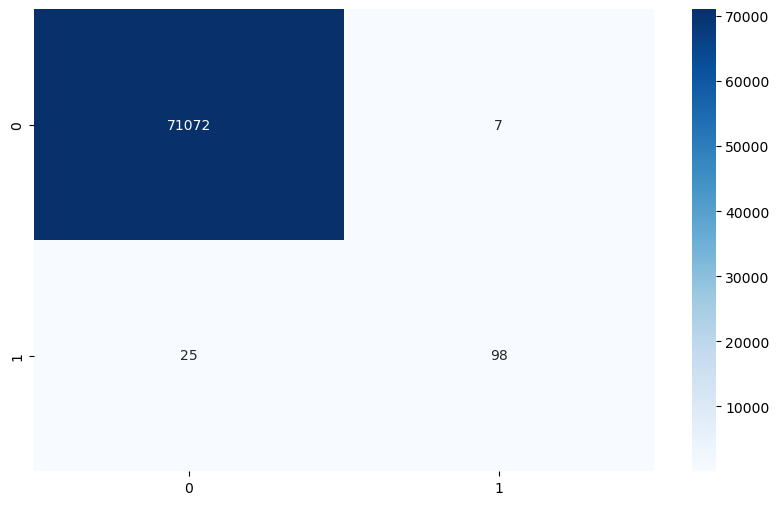

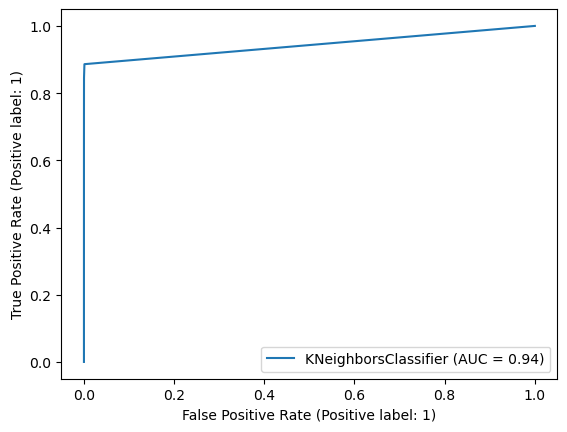

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.85      0.90       123

    accuracy                           1.00     71202
   macro avg       0.97      0.93      0.95     71202
weighted avg       1.00      1.00      1.00     71202
 



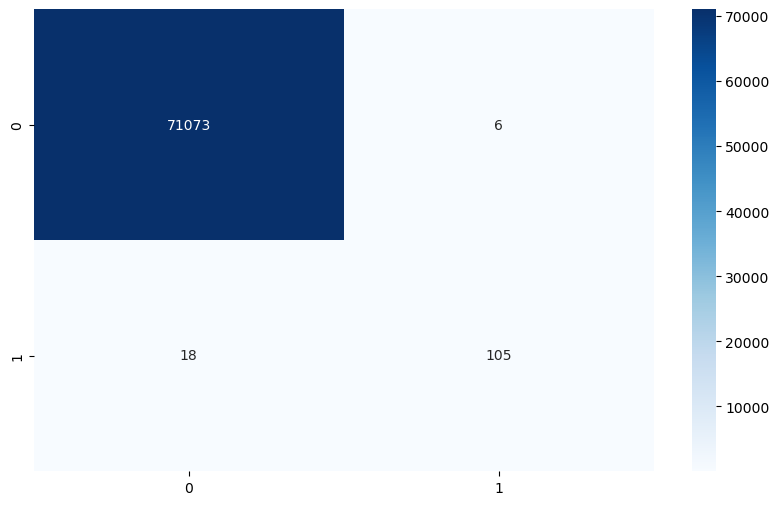

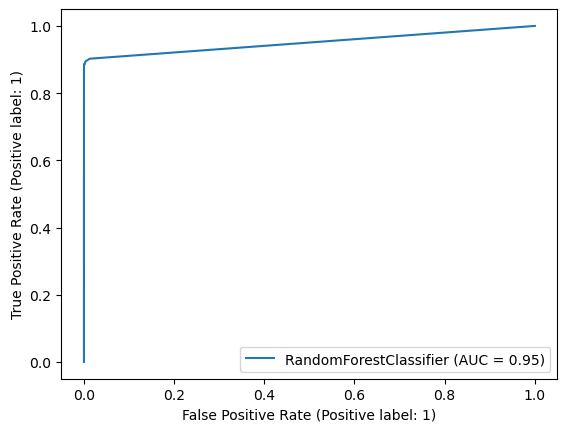

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.67      0.71       123

    accuracy                           1.00     71202
   macro avg       0.88      0.83      0.85     71202
weighted avg       1.00      1.00      1.00     71202
 



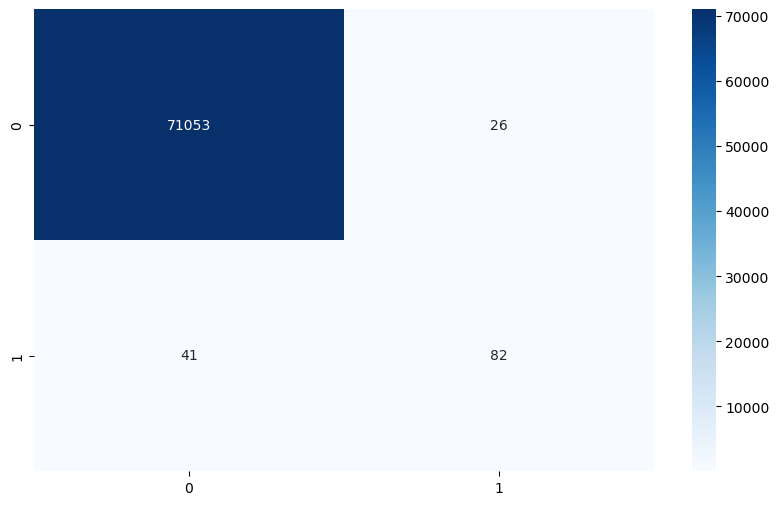

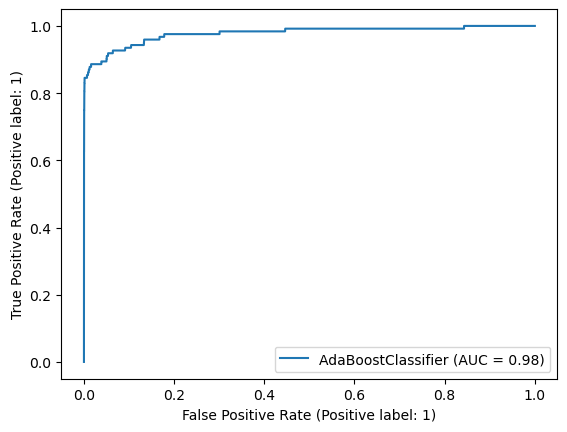

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.69      0.28      0.40       123

    accuracy                           1.00     71202
   macro avg       0.84      0.64      0.70     71202
weighted avg       1.00      1.00      1.00     71202
 



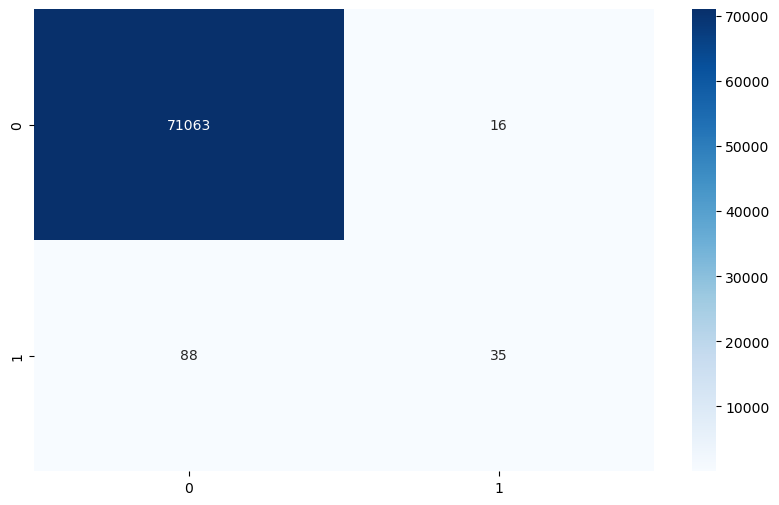

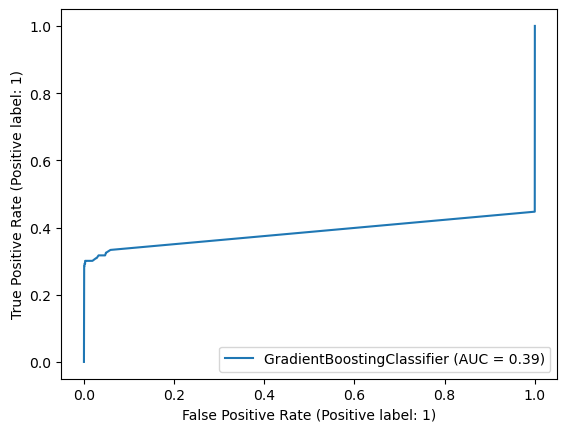

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.82      0.88       123

    accuracy                           1.00     71202
   macro avg       0.98      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202
 



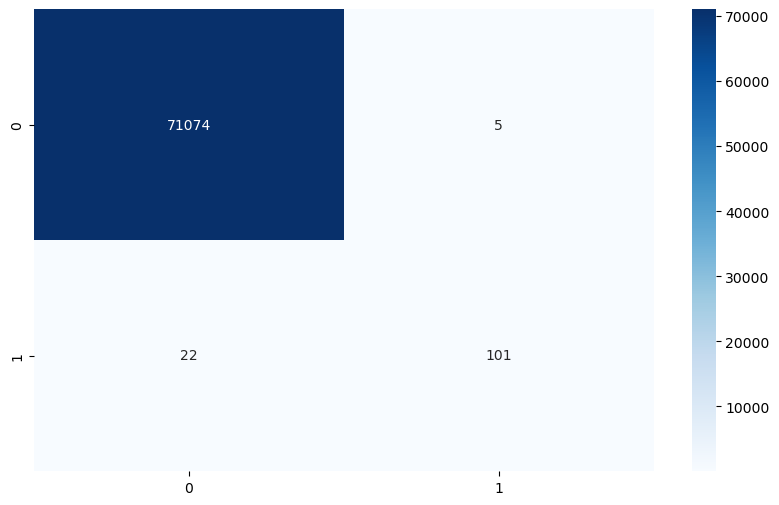

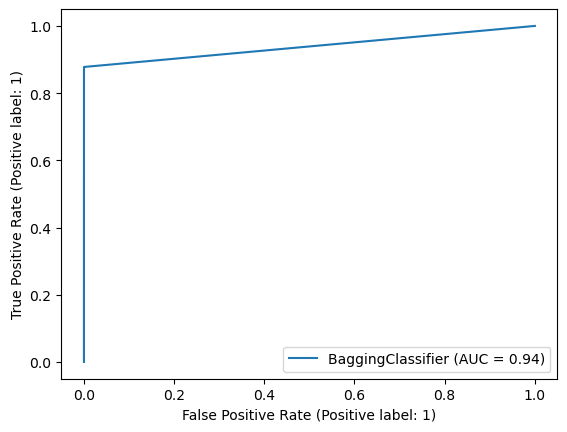

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.57      0.68       123

    accuracy                           1.00     71202
   macro avg       0.92      0.78      0.84     71202
weighted avg       1.00      1.00      1.00     71202
 



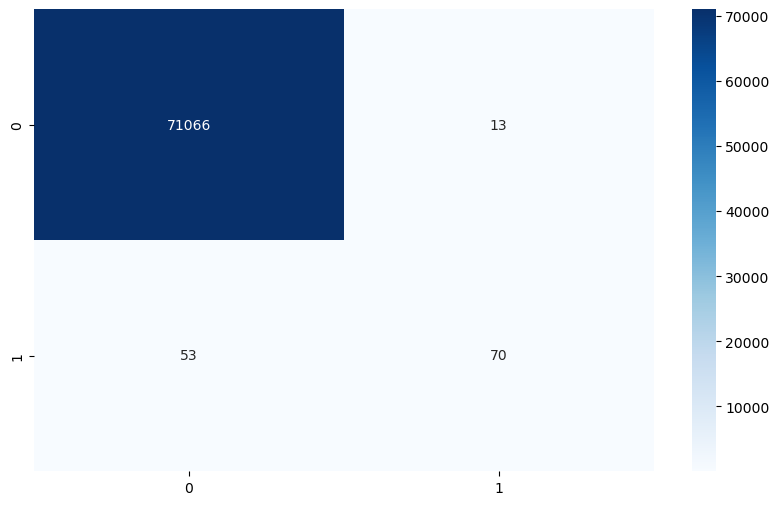

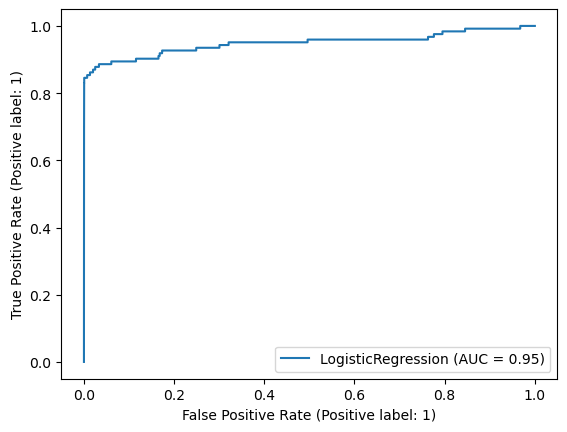

SGDClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.54      0.64       123

    accuracy                           1.00     71202
   macro avg       0.90      0.77      0.82     71202
weighted avg       1.00      1.00      1.00     71202
 

probability estimates are not available for loss='hinge'


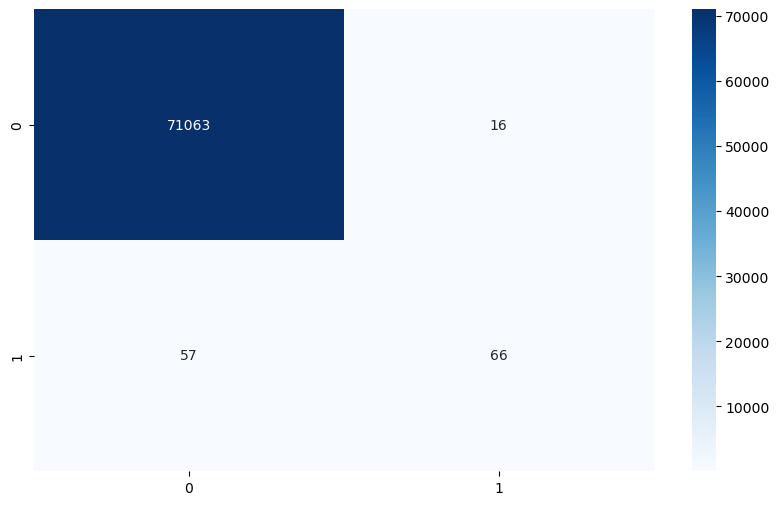

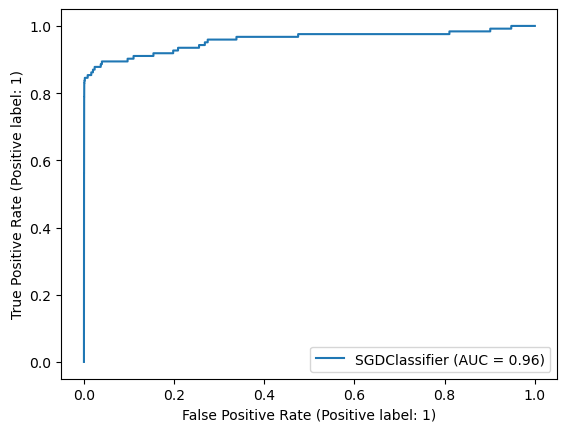

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.80      0.83       123

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202
 



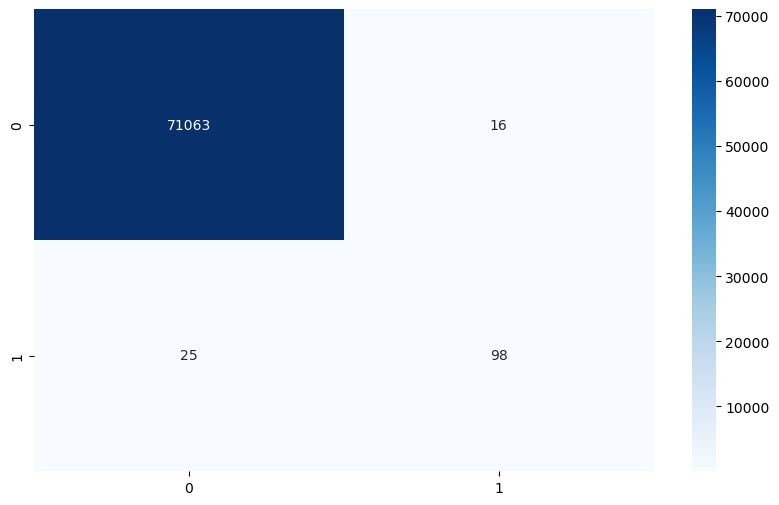

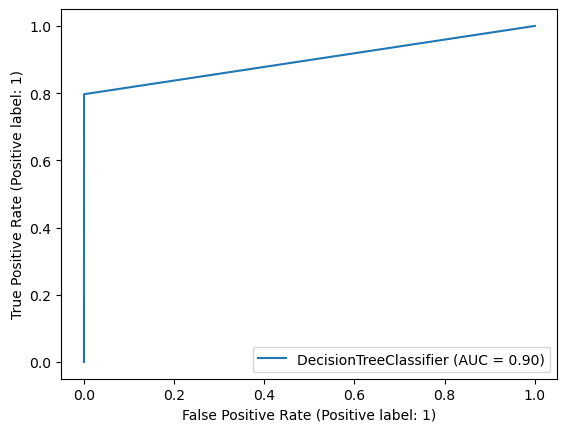

SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.72      0.82       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202
 

predict_proba is not available when  probability=False


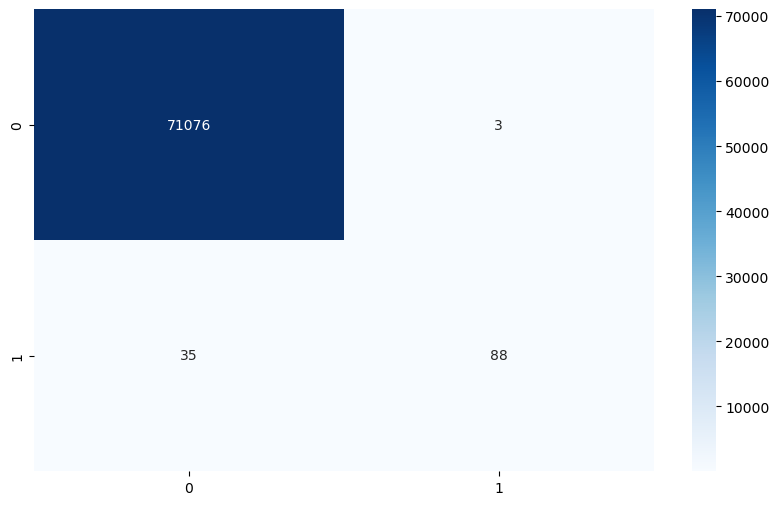

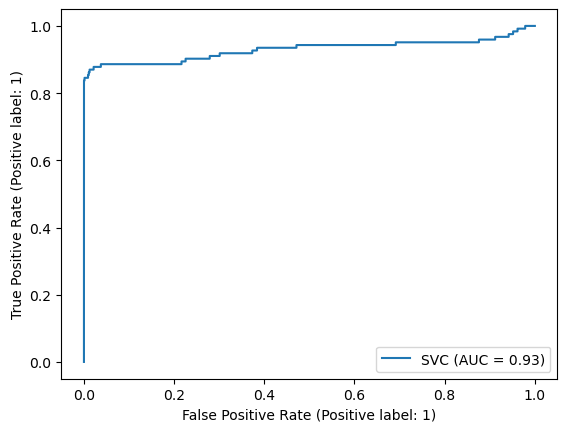

DummyClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202
 



C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



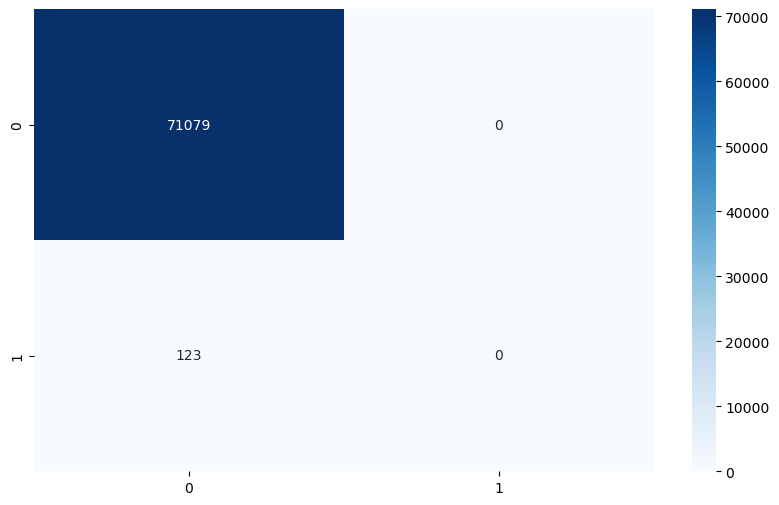

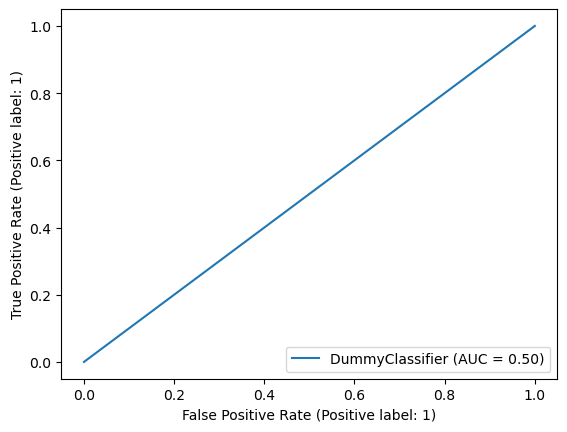

[['KNeighborsClassifier', {'f1_score_binary': 0.8596491228070176, 'f1_score_micro': 0.9995505744220669, 'f1_score_macro': 0.9297120248291222, 'f1_score_weighted': 0.9995328623881858}, 0.8621249283808766, 0.9429791104984868], ['RandomForestClassifier', {'f1_score_binary': 0.8974358974358975, 'f1_score_micro': 0.9996629308165501, 'f1_score_macro': 0.9486335427251232, 'f1_score_weighted': 0.9996543022423039}, 0.8984535934518173, 0.9504811261762218], ['AdaBoostClassifier', {'f1_score_binary': 0.7099567099567099, 'f1_score_micro': 0.9990590151962023, 'f1_score_macro': 0.8547427265538299, 'f1_score_weighted': 0.9990285133809589}, 0.710992864497533, 0.9778044399698629], ['GradientBoostingClassifier', {'f1_score_binary': 0.40229885057471265, 'f1_score_micro': 0.9985393668717171, 'f1_score_macro': 0.7007838202813801, 'f1_score_weighted': 0.9982375366166838}, 0.44133346205660856, 0.385775726241625], ['BaggingClassifier', {'f1_score_binary': 0.8820960698689957, 'f1_score_micro': 0.999620797168618

In [33]:
algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_train_tl, y_train_tl, X_test, y_test,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [34]:
df_tl = pd.DataFrame(algo, columns = ["Model", "F_Score", "MCC", "AUC"])
df_tl = pd.concat([df_tl.drop(['F_Score'], axis=1), df_tl['F_Score'].apply(pd.Series)], axis=1)
df_tl

Model       MCC       AUC  f1_score_binary  \
0        KNeighborsClassifier  0.862125  0.942979         0.859649   
1      RandomForestClassifier  0.898454  0.950481         0.897436   
2          AdaBoostClassifier  0.710993  0.977804         0.709957   
3  GradientBoostingClassifier  0.441333  0.385776         0.402299   
4           BaggingClassifier  0.884355  0.938880         0.882096   
5          LogisticRegression  0.692380  0.948668         0.679612   
6               SGDClassifier  0.656715       NaN         0.643902   
7      DecisionTreeClassifier  0.827315  0.898261         0.827004   
8                         SVC  0.831546       NaN         0.822430   
9             DummyClassifier  0.000000  0.500000         0.000000   

   f1_score_micro  f1_score_macro  f1_score_weighted  
0        0.999551        0.929712           0.999533  
1        0.999663        0.948634           0.999654  
2        0.999059        0.854743           0.999029  
3        0.998539        0.700784           0.998238  
4        0.999621        0.940953           0.999607  
5        0.999073        0.839574           0.998983  
6        0.998975        0.821695           0.998872  
7        0.999424        0.913358           0.999413  
8        0.999466        0.911081           0.999426  
9        0.998273        0.499568           0.997410

### Synthetic Minority Oversampling Technique (SMOTE)
- We are avoiding Naive Random Over-Sampling because the model lose the ability to generalize and may overfit.

In [35]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [36]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,y_smote,test_size=0.25,random_state=42, stratify=y_smote)
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((426472, 8), (142158, 8), (426472,), (142158,))

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.25      1.00      0.40       123

    accuracy                           0.99     71202
   macro avg       0.62      1.00      0.70     71202
weighted avg       1.00      0.99      1.00     71202
 



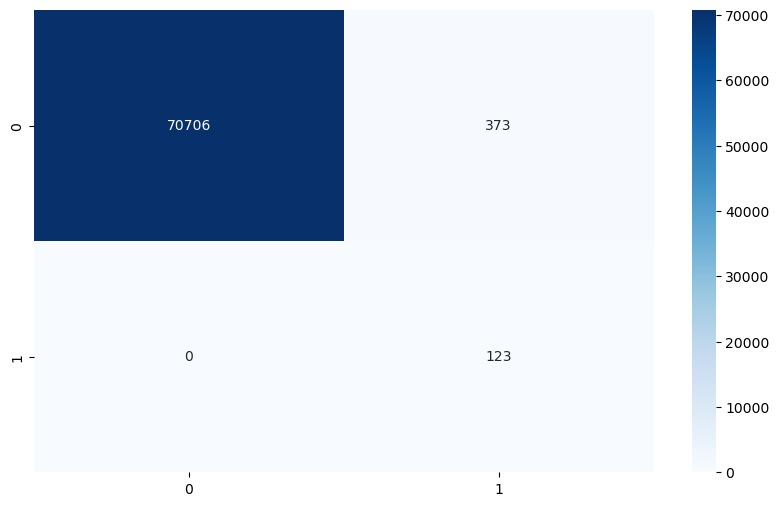

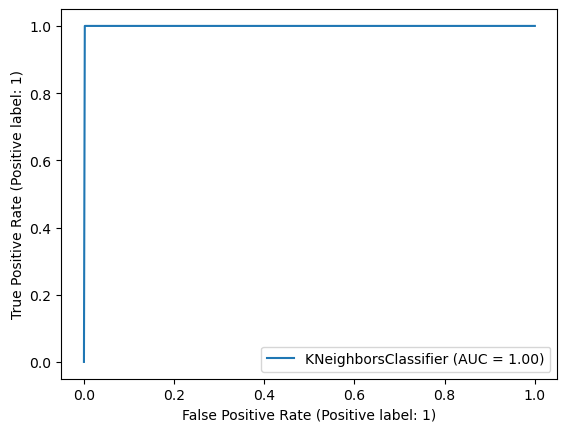

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      1.00      0.85       123

    accuracy                           1.00     71202
   macro avg       0.87      1.00      0.92     71202
weighted avg       1.00      1.00      1.00     71202
 



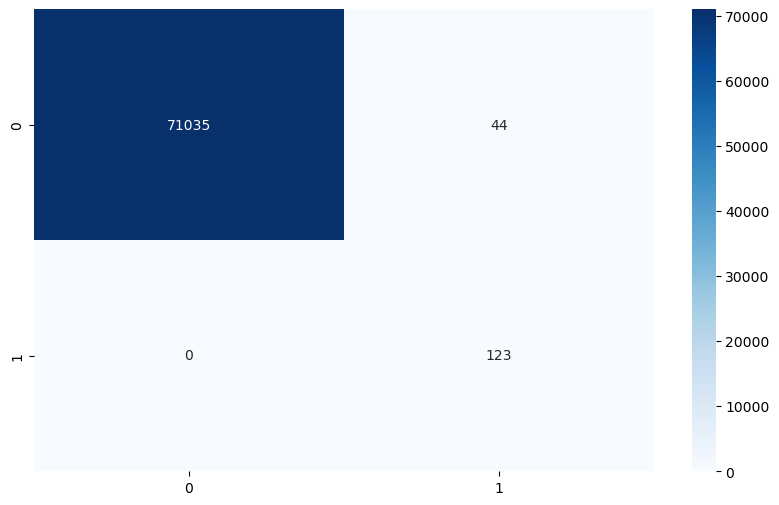

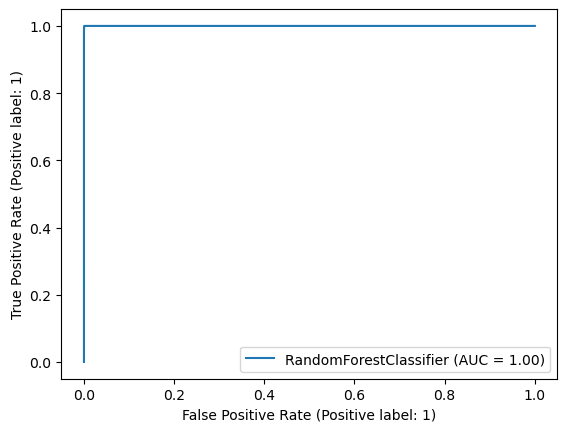

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.89      0.08       123

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.97      0.98     71202
 



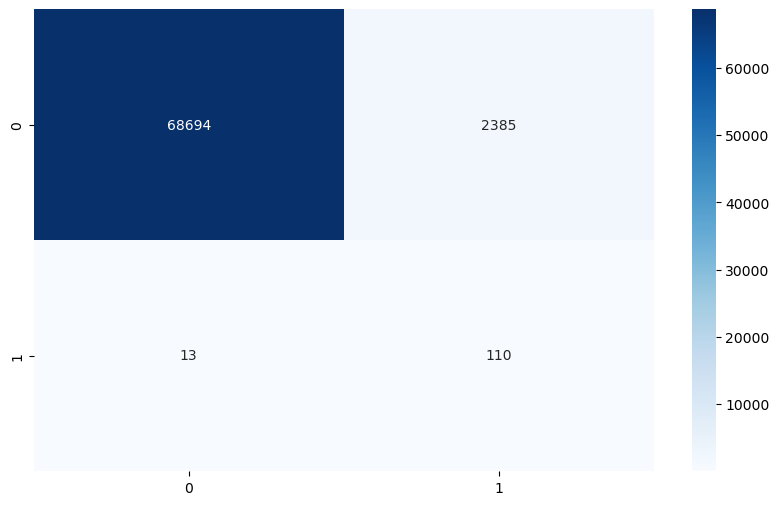

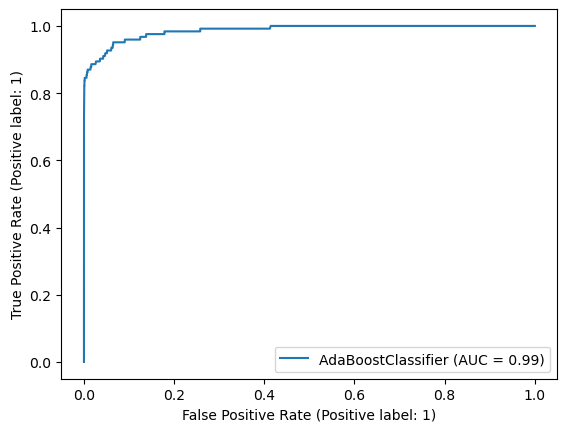

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.91      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202
 



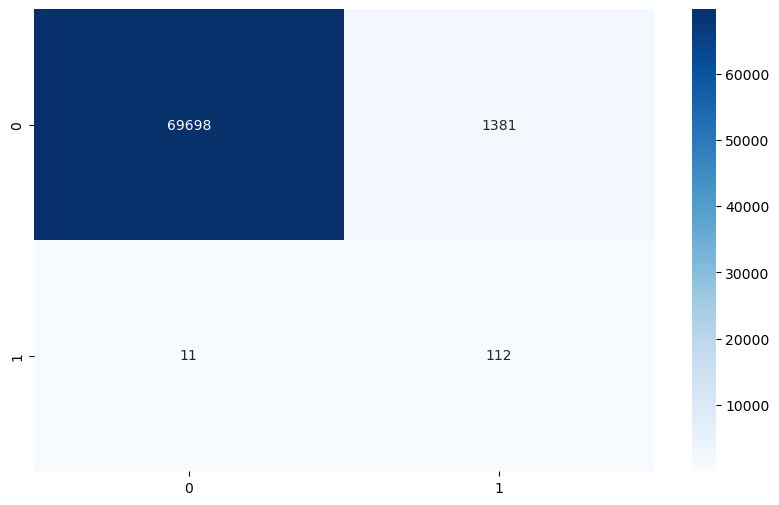

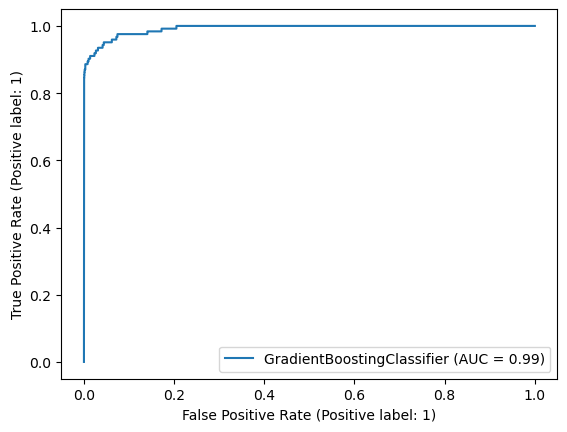

BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.50      1.00      0.67       123

    accuracy                           1.00     71202
   macro avg       0.75      1.00      0.83     71202
weighted avg       1.00      1.00      1.00     71202
 



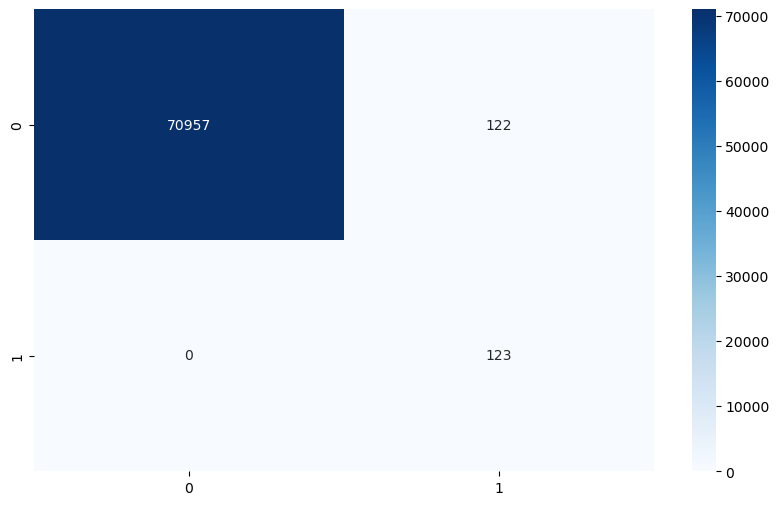

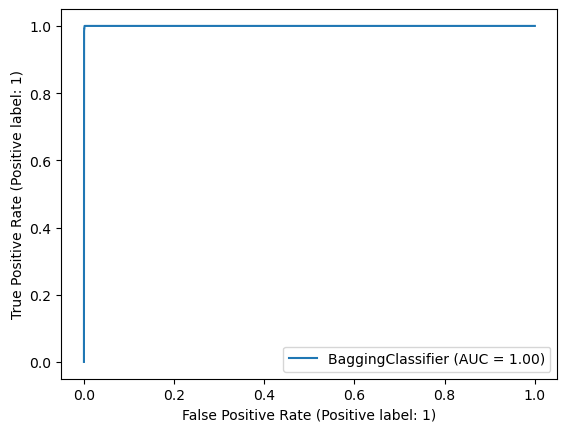

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.88      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202
 



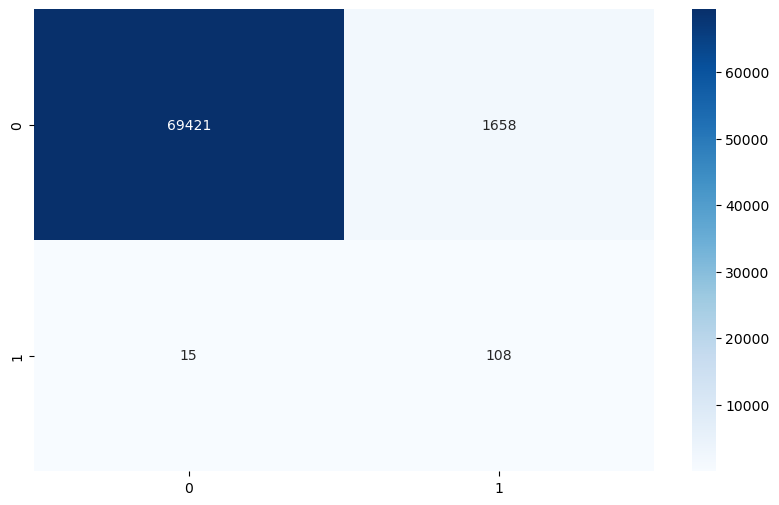

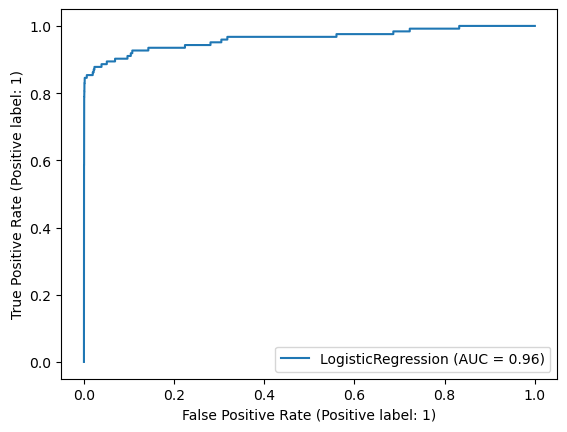

SGDClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.85      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202
 

probability estimates are not available for loss='hinge'


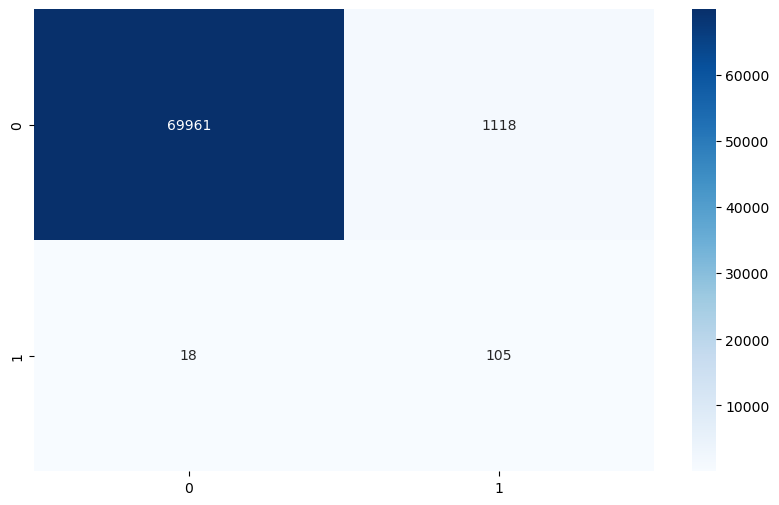

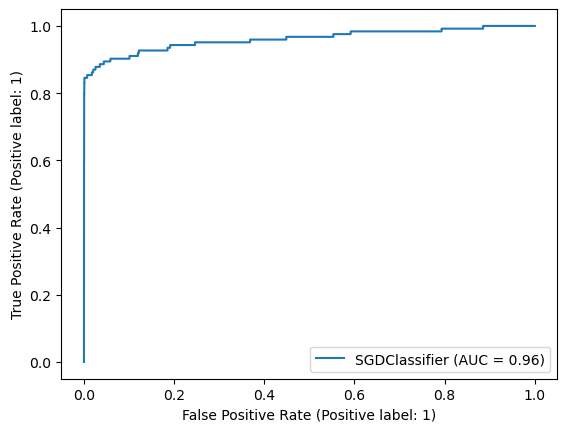

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.29      1.00      0.45       123

    accuracy                           1.00     71202
   macro avg       0.65      1.00      0.73     71202
weighted avg       1.00      1.00      1.00     71202
 



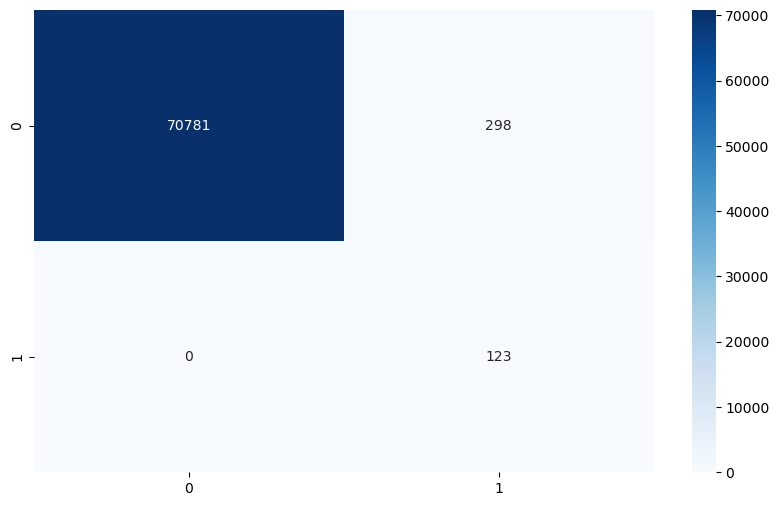

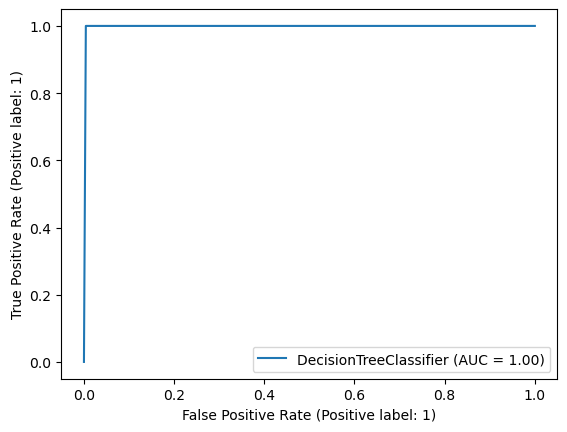

SVC
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.86      0.18       123

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.59     71202
weighted avg       1.00      0.99      0.99     71202
 

predict_proba is not available when  probability=False


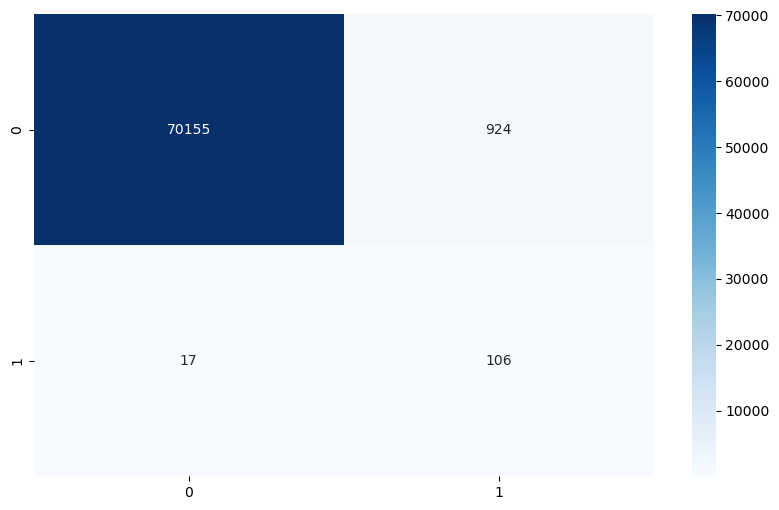

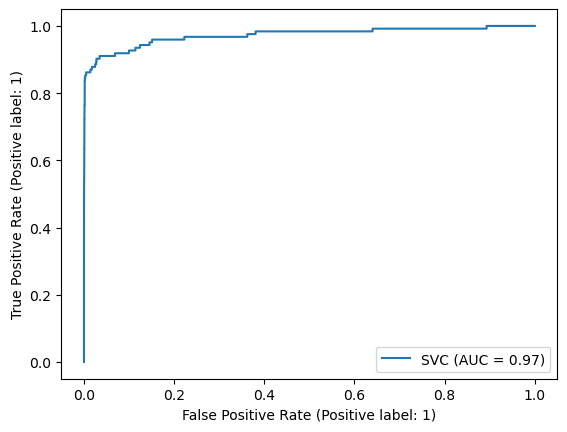

DummyClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202
 



C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saire\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



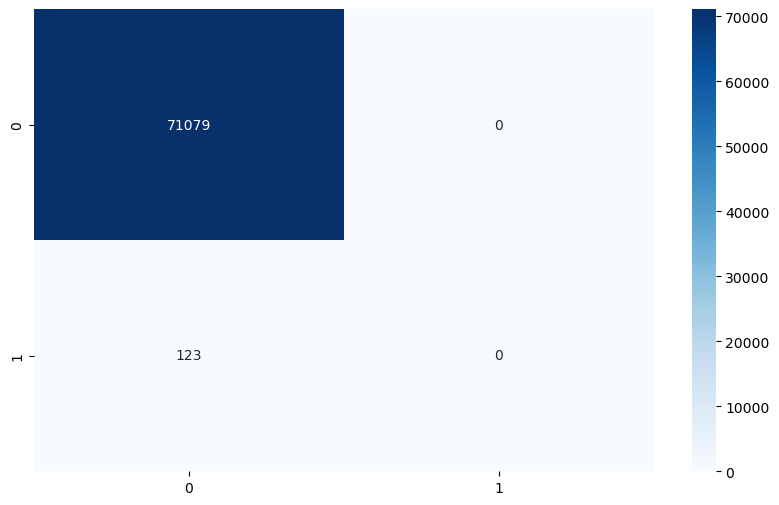

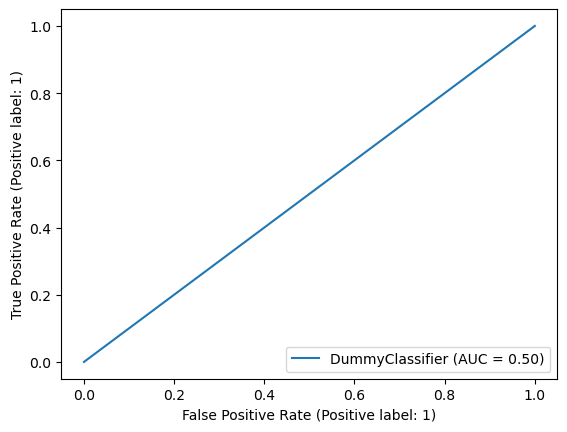

[['KNeighborsClassifier', {'f1_score_binary': 0.3974151857835218, 'f1_score_micro': 0.9947613831072161, 'f1_score_macro': 0.6973922210259077, 'f1_score_weighted': 0.996332847871484}, 0.4966714511958295, 0.99905738685125], ['RandomForestClassifier', {'f1_score_binary': 0.8482758620689654, 'f1_score_micro': 0.9993820398303418, 'f1_score_macro': 0.9239831257373269, 'f1_score_weighted': 0.9994288239038427}, 0.8579458107468784, 0.9999800977201938], ['AdaBoostClassifier', {'f1_score_binary': 0.08403361344537816, 'f1_score_micro': 0.9663211707536306, 'f1_score_macro': 0.533439409844604, 'f1_score_weighted': 0.9812925275843231}, 0.1943868398857731, 0.9865301027129209], ['GradientBoostingClassifier', {'f1_score_binary': 0.13861386138613863, 'f1_score_micro': 0.9804499873599056, 'f1_score_macro': 0.5643633275450737, 'f1_score_weighted': 0.9886418466986566}, 0.2582824085772994, 0.9922969026676718], ['BaggingClassifier', {'f1_score_binary': 0.6684782608695652, 'f1_score_micro': 0.9982865649841297,

In [37]:
algo = []
for algorithm in algorithms:
    print(type(algorithm).__name__)

    f_score, MCC, AUC = confusion(X_train_smote, y_train_smote, X_test, y_test,model= algorithm)
    algo.append([type(algorithm).__name__, f_score, MCC, AUC])
print(algo)

In [38]:
df_smote = pd.DataFrame(algo, columns = ["Model", "F_Score", "MCC", "AUC"])
df_smote = pd.concat([df_smote.drop(['F_Score'], axis=1), df_smote['F_Score'].apply(pd.Series)], axis=1)
df_smote

Model       MCC       AUC  f1_score_binary  \
0        KNeighborsClassifier  0.496671  0.999057         0.397415   
1      RandomForestClassifier  0.857946  0.999980         0.848276   
2          AdaBoostClassifier  0.194387  0.986530         0.084034   
3  GradientBoostingClassifier  0.258282  0.992297         0.138614   
4           BaggingClassifier  0.707940  0.999842         0.668478   
5          LogisticRegression  0.228224  0.962305         0.114346   
6               SGDClassifier  0.267814       NaN         0.156018   
7      DecisionTreeClassifier  0.539385  0.997904         0.452206   
8                         SVC  0.295204       NaN         0.183868   
9             DummyClassifier  0.000000  0.500000         0.000000   

   f1_score_micro  f1_score_macro  f1_score_weighted  
0        0.994761        0.697392           0.996333  
1        0.999382        0.923983           0.999429  
2        0.966321        0.533439           0.981293  
3        0.980450        0.564363           0.988642  
4        0.998287        0.833810           0.998570  
5        0.976503        0.551220           0.986584  
6        0.984045        0.573982           0.990503  
7        0.995815        0.725053           0.996957  
8        0.986784        0.588603           0.991940  
9        0.998273        0.499568           0.997410